# 프로젝트 개요

## 프로젝트에서 사용하는 파일
  - 데이터 다운로드 주소 : https://github.com/hjk7902/ml
  - CUST_DATA.csv : 고객 데이터
  - CLAIM_DATA.csv : 보험 청구 데이터

# EDA

## 라이브러리 로드 및 기본 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

In [3]:
cust = pd.read_csv('CUST_DATA.csv', encoding='utf-16')
claim = pd.read_csv('CLAIM_DATA.csv', encoding='utf-16')

## CUST_DATA

### 기본 정보 탐색

In [4]:
cust.shape

(22400, 25)

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           22400 non-null  int64  
 1   DIVIDED_SET       22400 non-null  int64  
 2   SIU_CUST_YN       20607 non-null  object 
 3   SEX               22400 non-null  int64  
 4   AGE               22400 non-null  int64  
 5   RESI_COST         22400 non-null  int64  
 6   RESI_TYPE_CODE    21146 non-null  float64
 7   FP_CAREER         22400 non-null  object 
 8   CUST_RGST         21944 non-null  float64
 9   CTPR              21779 non-null  object 
 10  OCCP_GRP_1        21805 non-null  object 
 11  OCCP_GRP_2        21805 non-null  object 
 12  TOTALPREM         16609 non-null  float64
 13  MINCRDT           12924 non-null  float64
 14  MAXCRDT           12924 non-null  float64
 15  WEDD_YN           21927 non-null  object 
 16  MATE_OCCP_GRP_1   10573 non-null  object

In [6]:
cust.describe(include='all')

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
count,22400.000000,22400.000000,20607,22400.000000,22400.000000,22400.000000,21146.000000,22400,21944.000000,21779,21805,21805,1.660900e+04,12924.000000,12924.000000,21927,10573,10573,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,17,8,25,NaN,NaN,NaN,2,8,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,NaN,N,NaN,경기,8.기타,주부,NaN,NaN,NaN,Y,1.주부,주부,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18801,NaN,NaN,NaN,NaN,21182,NaN,5200,4879,4837,NaN,NaN,NaN,12010,2394,2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11200.500000,1.080045,NaN,1.565134,44.734866,15914.413973,25.765251,NaN,198924.250638,NaN,NaN,NaN,2.998266e+07,5.838904,19.480656,NaN,NaN,NaN,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,NaN,0.495750,15.445707,14963.317519,20.691869,NaN,16989.329112,NaN,NaN,NaN,4.897438e+07,3.515198,32.363151,NaN,NaN,NaN,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,NaN,1.000000,2.000000,0.000000,11.000000,NaN,101.000000,NaN,NaN,NaN,5.000000e+02,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,NaN,1.000000,34.000000,6732.750000,20.000000,NaN,200306.000000,NaN,NaN,NaN,6.665459e+06,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200404.000000,1.129440e+05,0.000000,2995.000000,3557.750000
50%,11200.500000,1.000000,NaN,2.000000,46.000000,12222.000000,20.000000,NaN,200306.000000,NaN,NaN,NaN,1.622463e+07,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200901.000000,2.265920e+05,3432.000000,4807.000000,4681.000000
75%,16800.250000,1.000000,NaN,2.000000,56.000000,20988.000000,30.000000,NaN,200402.000000,NaN,NaN,NaN,3.479439e+07,6.000000,7.000000,NaN,NaN,NaN,1.000000,19.000000,201402.000000,4.852868e+05,4398.000000,6607.250000,6839.500000


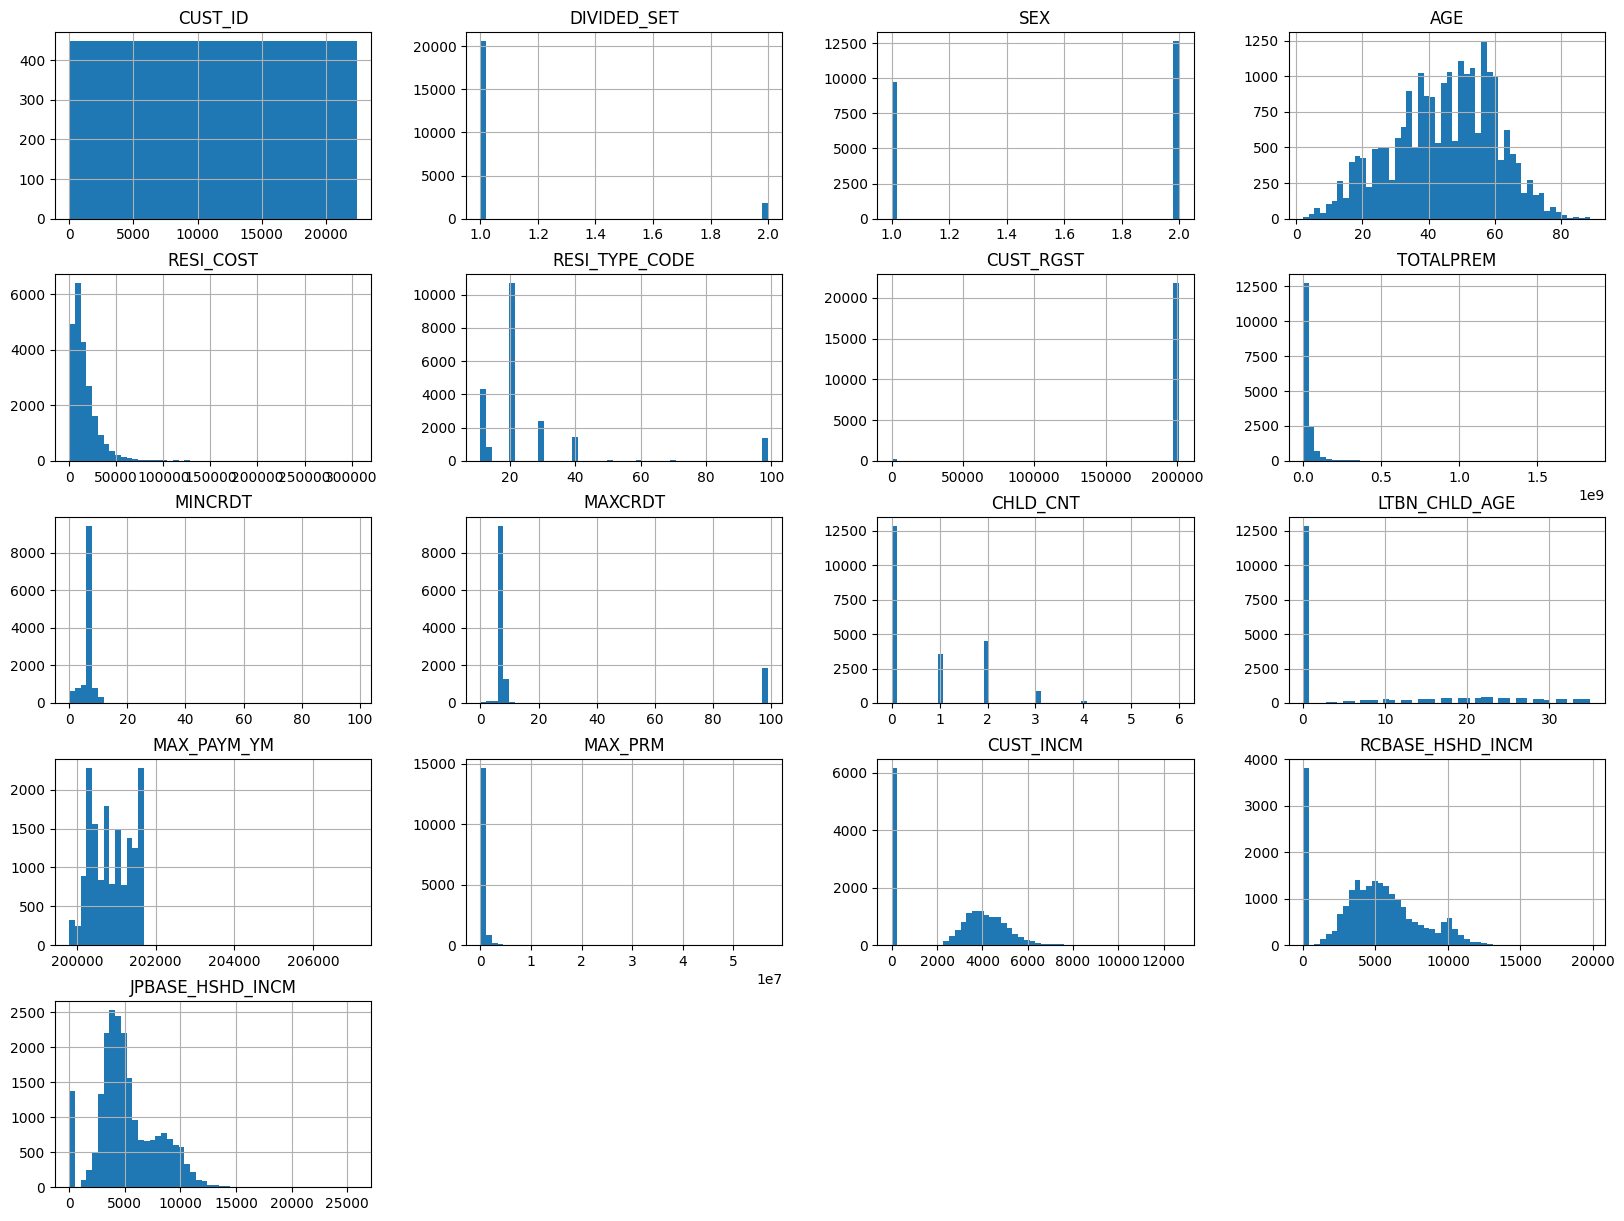

In [7]:
cust.hist(bins=50, figsize=(20,15))
plt.show()

### 결측치 분포 확인

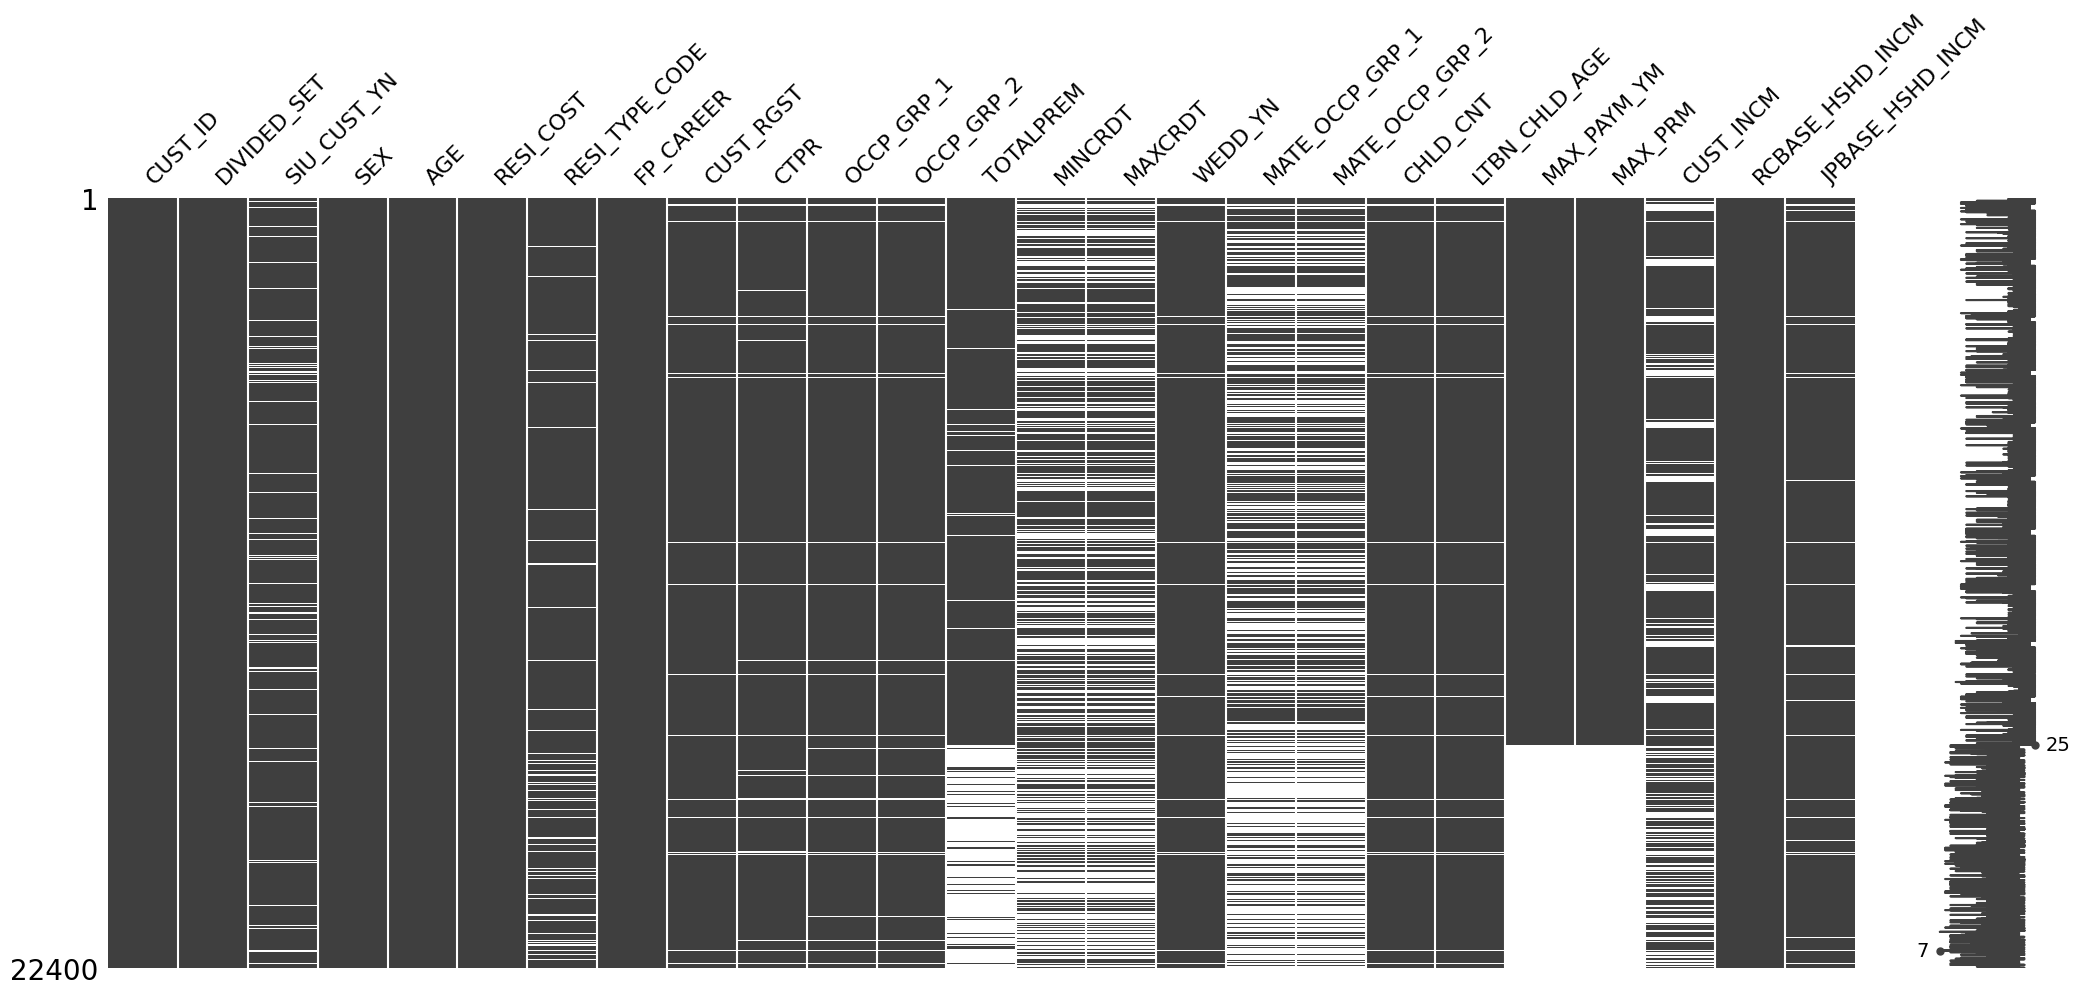

In [8]:
import missingno # pip install missingno
missingno.matrix(cust)
plt.show()

### 변수별 정보 확인

In [9]:
cust['SIU_CUST_YN'].value_counts()

SIU_CUST_YN
N    18801
Y     1806
Name: count, dtype: int64

In [10]:
cust['FP_CAREER'].value_counts()

FP_CAREER
N    21182
Y     1218
Name: count, dtype: int64

In [11]:
cust['CTPR'].value_counts()

CTPR
경기    5200
서울    3667
경남    1595
부산    1519
인천    1465
전남    1119
대구     998
경북     981
전북     962
광주     863
충남     767
울산     708
충북     623
강원     571
대전     510
제주     190
세종      41
Name: count, dtype: int64

In [12]:
cust['OCCP_GRP_1'].value_counts()

OCCP_GRP_1
8.기타      4879
1.주부      4820
3.사무직     3327
5.서비스     2800
2.자영업     2301
4.전문직     1979
6.제조업     1364
7.1차산업     335
Name: count, dtype: int64

In [13]:
cust['OCCP_GRP_2'].value_counts()

OCCP_GRP_2
주부          4837
학생          3953
사무직         2517
3차산업 종사자    2089
자영업         2067
2차산업 종사자    2031
운전직          528
기타           457
공무원          442
교육관련직        424
1차산업 종사자     386
전문직          378
의료직 종사자      347
단순 사무직       317
교사           266
단순 노무직       204
예체능계 종사자     171
기업/단체 임원     128
종교인/역술인       74
고위 공무원        47
학자/연구직        44
고소득의료직        40
대학교수/강사       34
고소득 전문직       19
법무직 종사자        5
Name: count, dtype: int64

In [14]:
cust['WEDD_YN'].value_counts()

WEDD_YN
Y    12010
N     9917
Name: count, dtype: int64

In [15]:
cust['MATE_OCCP_GRP_1'].value_counts()

MATE_OCCP_GRP_1
1.주부      2394
3.사무직     2051
5.서비스     1523
2.자영업     1418
6.제조업     1157
4.전문직     1058
8.기타       636
7.1차산업     336
Name: count, dtype: int64

In [16]:
cust['MATE_OCCP_GRP_2'].value_counts()

MATE_OCCP_GRP_2
주부          2402
사무직         1662
2차산업 종사자    1480
자영업         1322
3차산업 종사자     941
운전직          587
1차산업 종사자     388
전문직          259
공무원          241
기타           239
교육관련직        170
단순 노무직       160
기업/단체 임원     137
교사           131
단순 사무직       113
의료직 종사자       99
예체능계 종사자      48
종교인/역술인       43
고위 공무원        38
고소득의료직        30
학생            30
대학교수/강사       25
학자/연구직        22
고소득 전문직        6
Name: count, dtype: int64

## CMAIM_DATA

### 기본정보 확인

In [17]:
claim.shape

(119020, 39)

In [18]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119020 entries, 0 to 119019
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CUST_ID          119020 non-null  int64  
 1   POLY_NO          119020 non-null  int64  
 2   ACCI_OCCP_GRP1   117603 non-null  object 
 3   ACCI_OCCP_GRP2   117603 non-null  object 
 4   CHANG_FP_YN      119020 non-null  object 
 5   CNTT_RECP_SQNO   119020 non-null  int64  
 6   RECP_DATE        119020 non-null  int64  
 7   ORIG_RESN_DATE   119020 non-null  int64  
 8   RESN_DATE        119020 non-null  int64  
 9   CRNT_PROG_DVSN   119020 non-null  int64  
 10  ACCI_DVSN        119020 non-null  int64  
 11  CAUS_CODE        119020 non-null  object 
 12  CAUS_CODE_DTAL   119020 non-null  object 
 13  DSAS_NAME        119020 non-null  object 
 14  DMND_RESN_CODE   119020 non-null  int64  
 15  DMND_RSCD_SQNO   119020 non-null  int64  
 16  HOSP_OTPA_STDT   86449 non-null   floa

In [19]:
claim.describe(include="all")

,CUST_ID,POLY_NO,ACCI_OCCP_GRP1,ACCI_OCCP_GRP2,CHANG_FP_YN,CNTT_RECP_SQNO,RECP_DATE,ORIG_RESN_DATE,RESN_DATE,CRNT_PROG_DVSN,ACCI_DVSN,CAUS_CODE,CAUS_CODE_DTAL,DSAS_NAME,DMND_RESN_CODE,DMND_RSCD_SQNO,HOSP_OTPA_STDT,HOSP_OTPA_ENDT,RESL_CD1,RESL_NM1,VLID_HOSP_OTDA,HOUSE_HOSP_DIST,HOSP_CODE,ACCI_HOSP_ADDR,HOSP_SPEC_DVSN,CHME_LICE_NO,PAYM_DATE,DMND_AMT,PAYM_AMT,PMMI_DLNG_YN,SELF_CHAM,NON_PAY,TAMT_SFCA,PATT_CHRG_TOTA,DSCT_AMT,COUNT_TRMT_ITEM,DCAF_CMPS_XCPA,NON_PAY_RATIO,HEED_HOSP_YN
count,119020.000000,119020.000000,117603,117603,119020,1.190200e+05,1.190200e+05,1.190200e+05,1.190200e+05,119020.000000,119020.000000,119020,119020,119020,119020.000000,119020.000000,8.644900e+04,8.644900e+04,119020,119020,119020.000000,101972.000000,1.190110e+05,108950,119011.000000,1.190200e+05,1.190070e+05,1.190200e+05,1.190200e+05,119020,1.896700e+04,1.896700e+04,1.896700e+04,1.896700e+04,1.896700e+04,18967.000000,8.057000e+03,119020.000000,119020
unique,NaN,NaN,8,25,2,NaN,NaN,NaN,NaN,NaN,NaN,943,136,63420,NaN,NaN,NaN,NaN,912,911,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,8.기타,주부,N,NaN,NaN,NaN,NaN,NaN,NaN,W01,#,제왕절개술,NaN,NaN,NaN,NaN,S13,목부위의 관절및인대의 탈구|염좌및긴장(경추),NaN,NaN,NaN,서울,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,NaN,NaN,28423,25339,71386,NaN,NaN,NaN,NaN,NaN,NaN,15297,52091,489,NaN,NaN,NaN,NaN,5342,5342,NaN,NaN,NaN,23630,NaN,NaN,NaN,NaN,NaN,100053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115685
mean,11124.551504,47298.259965,NaN,NaN,NaN,2.012184e+12,2.011685e+07,2.011086e+07,2.011482e+07,21.567829,2.352697,NaN,NaN,NaN,3.089237,1.246312,2.011629e+07,2.011703e+07,NaN,NaN,8.721509,24.920284,7.971912e+03,NaN,28.686760,1.404356e+06,2.011697e+07,8.114452e+05,8.055836e+05,NaN,1.151285e+05,2.940175e+05,1.544454e+04,4.245879e+05,5.609277e+03,1.050931,1.110890e+05,0.087370,NaN
std,6462.759097,32103.972700,NaN,NaN,NaN,9.597075e+09,2.800165e+04,2.859218e+04,2.766586e+04,5.750613,0.890724,NaN,NaN,NaN,1.428316,0.833369,2.727863e+04,2.732307e+04,NaN,NaN,13.230779,58.942734,5.020564e+05,NaN,24.932621,1.171176e+07,2.800625e+04,4.174797e+06,4.112618e+06,NaN,2.061213e+05,6.692292e+05,2.803789e+05,8.460542e+05,8.306801e+04,0.244609,3.862795e+05,0.243291,NaN
min,1.000000,1.000000,NaN,NaN,NaN,2.006010e+12,2.006010e+07,1.999043e+07,2.006010e+07,11.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,2.006010e+07,2.006010e+07,NaN,NaN,0.000000,0.000000,2.000000e+00,NaN,10.000000,6.000000e+00,2.006010e+07,0.000000e+00,0.000000e+00,NaN,-7.600000e+03,-3.170000e+04,0.000000e+00,0.000000e+00,-1.590000e+03,0.000000,0.000000e+00,-1.056667,NaN
25%,5588.000000,18544.000000,NaN,NaN,NaN,2.009120e+12,2.009120e+07,2.009041e+07,2.009092e+07,23.000000,1.000000,NaN,NaN,NaN,2.000000,1.000000,2.009122e+07,2.010012e+07,NaN,NaN,0.000000,1.620000,1.887000e+03,NaN,10.000000,7.324000e+03,2.009121e+07,1.000000e+05,1.000000e+05,NaN,1.830000e+04,2.000000e+04,0.000000e+00,7.199300e+04,0.000000e+00,1.000000,1.000000e+04,0.000000,NaN
50%,11203.000000,39485.000000,NaN,NaN,NaN,2.012052e+12,2.012051e+07,2.011090e+07,2.012022e+07,23.000000,3.000000,NaN,NaN,NaN,2.000000,1.000000,2.012042e+07,2.012053e+07,NaN,NaN,5.000000,4.540000,5.135000e+03,NaN,20.000000,1.289400e+04,2.012052e+07,2.400000e+05,2.400000e+05,NaN,5.407500e+04,8.300000e+04,0.000000e+00,1.723000e+05,0.000000e+00,1.000000,2.500000e+04,0.000000,NaN
75%,16663.000000,78791.000000,NaN,NaN,NaN,2.014071e+12,2.014063e+07,2.013112e+07,2.014033e+07,23.000000,3.000000,NaN,NaN,NaN,5.000000,1.000000,2.014050e+07,2.014061e+07,NaN,NaN,13.000000,15.330000,7.870000e+03,NaN,30.000000,1.916300e+04,2.014070e+07,5.000000e+05,5.000000e+05,NaN,1.383150e+05,2.800000e+05,0.000000e+00,4.424950e+05,4.700000e+01,1.000000,9.852000e+04,0.000000,NaN


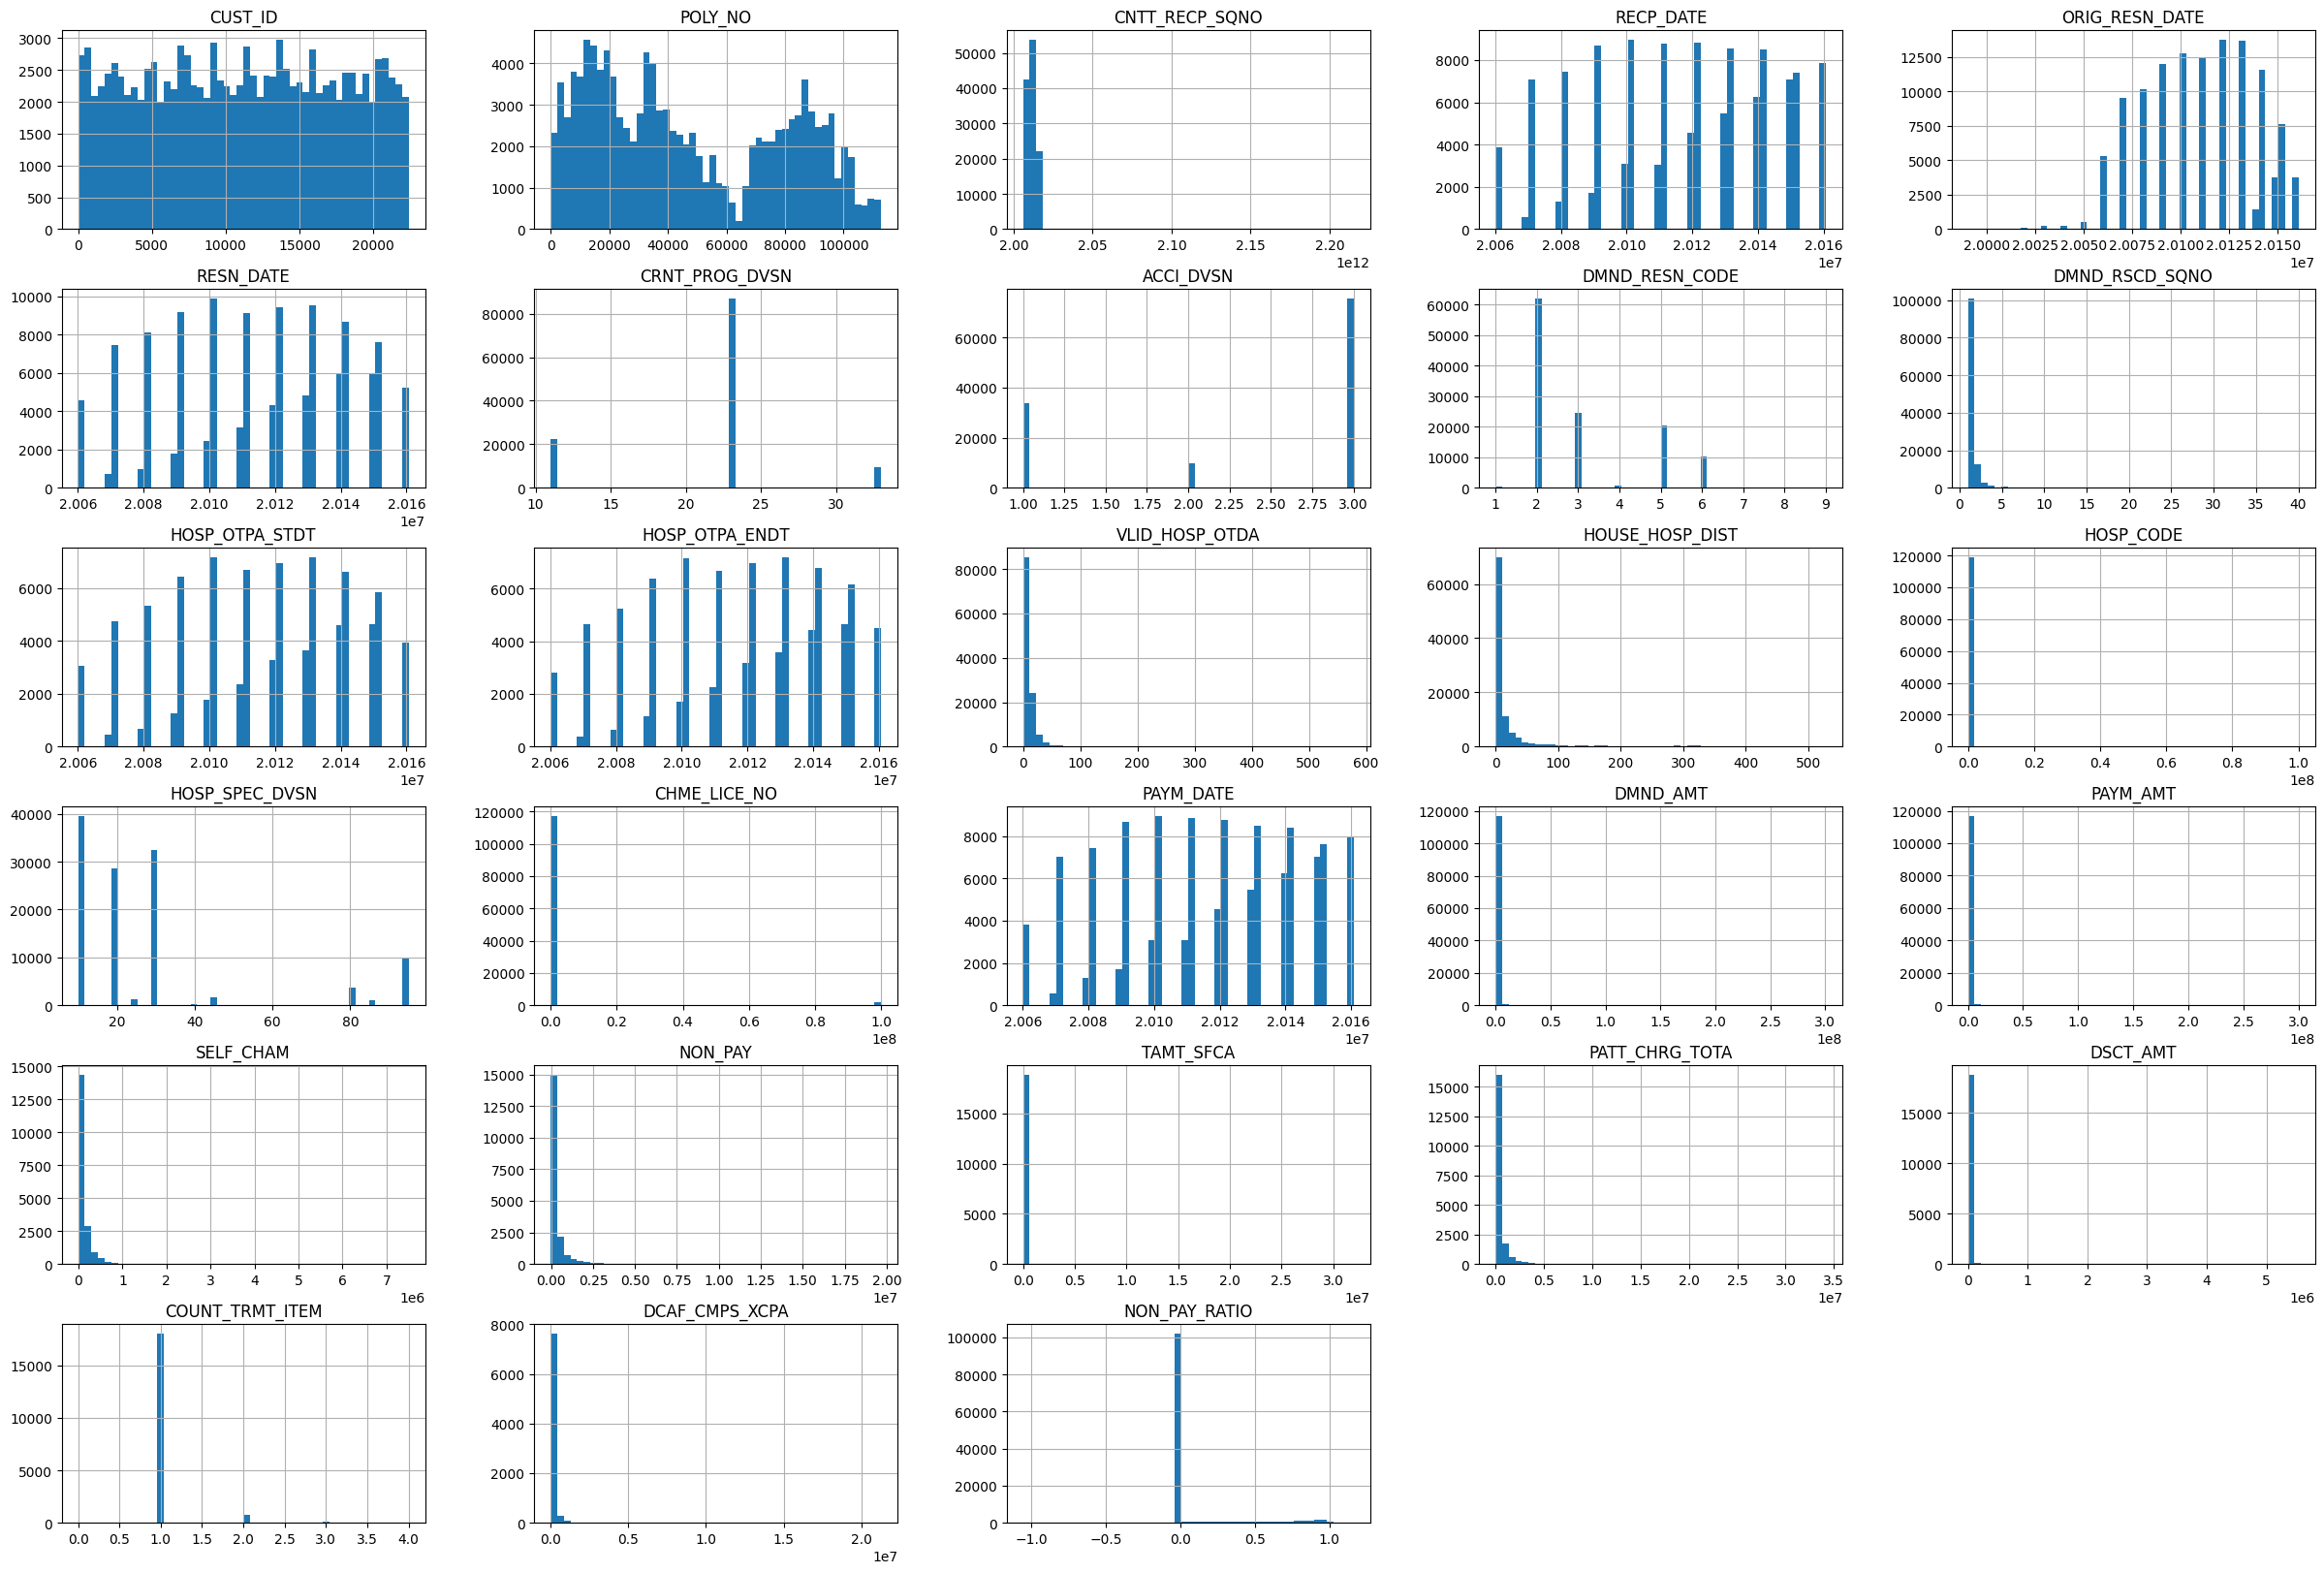

In [20]:
claim.hist(bins=50, figsize=(30,20))
plt.show()

### 결측치 분포 확인

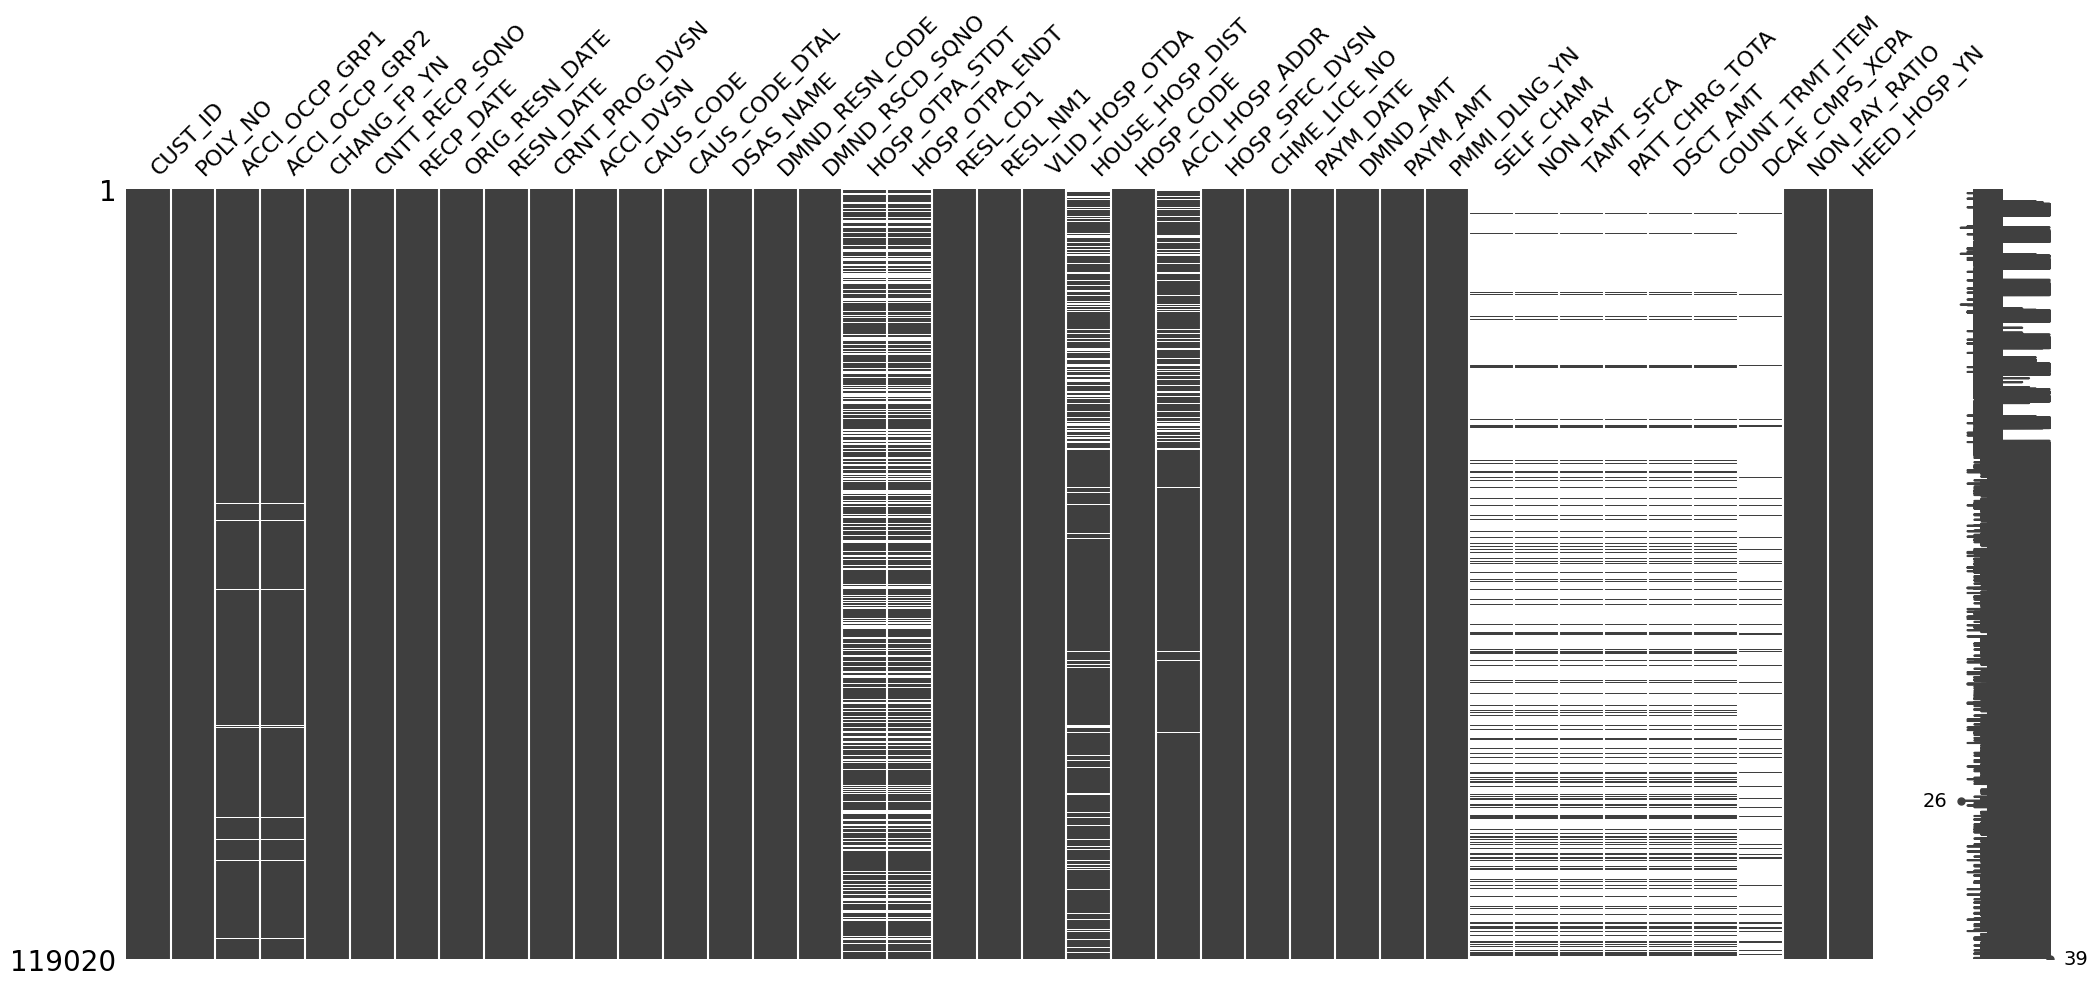

In [21]:
import missingno
missingno.matrix(claim)
plt.show()

### 변수별 정보 확인

In [22]:
claim['HEED_HOSP_YN'].value_counts()

HEED_HOSP_YN
N    115685
Y      3335
Name: count, dtype: int64

In [23]:
claim[claim['HEED_HOSP_YN']=='Y']['CHME_LICE_NO'].value_counts()

CHME_LICE_NO
4109     171
10952     62
4925      61
25697     59
2830      56
        ... 
18992      1
23322      1
3863       1
2012       1
68         1
Name: count, Length: 830, dtype: int64

In [24]:
claim['CUST_ID'].value_counts()[claim['CUST_ID'].value_counts() > 50]

CUST_ID
15109    98
13477    93
371      93
12678    91
1893     90
1737     90
540      88
6797     88
501      87
18887    87
20828    87
13990    84
4819     84
11807    82
13432    82
8971     81
21540    80
15701    74
15070    72
20122    71
9373     71
6236     70
3720     68
10625    68
2031     68
9123     67
14425    67
9568     66
1800     65
1005     64
1962     64
9258     62
3716     62
11197    61
10408    61
10221    61
15010    60
13925    59
13396    58
5225     58
525      57
10136    57
13644    57
14629    56
2264     56
7956     56
15964    56
13408    55
5892     55
21575    55
4567     54
11351    54
19390    54
21171    54
19489    54
7253     54
302      53
7173     51
904      51
7240     51
Name: count, dtype: int64

In [25]:
cust[cust['CUST_ID']==15109]

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
16871,15109,1,Y,1,57,18445,12.0,N,200404.0,인천,2.자영업,자영업,18094762.0,NaN,NaN,Y,2.자영업,3차산업 종사자,1.0,34.0,NaN,NaN,4372.0,6125,8448.0


In [26]:
cust[cust['CUST_ID']==5892]

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
15994,5892,1,Y,1,24,15236,11.0,N,200306.0,대구,8.기타,학생,NaN,NaN,NaN,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,6468,6141.0


# Feature Engineering


## CUST_DATA 전처리

    * AGE 변수 연령대로 변환
    * LTBN_CHLD_AGE 변수 연령대로 변환
    * MATE_OCCP_GRP_2 DROP
    * DATE 관련 컬럼 DROP
    * 직업/나이 고려 CUST_INCM 결측치 채우기
    * 직업 기준으로 JPBASE_HSHD_INCM 결측치 채우기
    * RESI_TYPE_CODE, CTPR 결측치 최빈값으로 채우기
    * WEDD_YN 결측치 N으로 채우기
    * LTBN_CHLD_AGE, CHLD_CNT, TOTALPREM, MAX_PRM 결측치 0으로 채우기
    * 분석에 유의미하지 않다고 판단하는 열(FP_CAREER) DROP
    * 카테고리 변수 원-핫 인코딩
    * 'RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM' 변수 StandardScaling

### 나이 관련 변수(AGE, LTBN_CHLD_AGE)를 연령대로 변환

In [27]:
cust['AGE'] = cust['AGE'].map(lambda x: int(x//10))
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0


In [28]:
cust['LTBN_CHLD_AGE'] = cust['LTBN_CHLD_AGE'].map(lambda x: x//10)

### OCCP_GRP2 변수 삭제

In [29]:
cust.drop('OCCP_GRP_2', axis=1, inplace=True)

### OCCP_GRP1 변수에서 코드번호 삭제

In [30]:
set(cust.OCCP_GRP_1)

{'1.주부', '2.자영업', '3.사무직', '4.전문직', '5.서비스', '6.제조업', '7.1차산업', '8.기타', nan}

In [31]:
cust['OCCP_GRP_1'] = cust['OCCP_GRP_1'].map(lambda x: str(x)[2:])
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,1.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,1.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,서비스,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,자영업,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,자영업,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,1.0,200807.0,166760.0,3894.0,0,8885.0


### MATE_OCCP_GRP_2 변수 삭제

In [32]:
cust.drop('MATE_OCCP_GRP_2', axis=1, inplace=True)

### MATE_OCCP_GRP_1 변수에서 코드번호 삭제

In [33]:
set(cust.MATE_OCCP_GRP_1)

{'1.주부', '2.자영업', '3.사무직', '4.전문직', '5.서비스', '6.제조업', '7.1차산업', '8.기타', nan}

In [34]:
cust['MATE_OCCP_GRP_1'] = cust['MATE_OCCP_GRP_1'].map(lambda x: str(x)[2:])
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,사무직,146980441.0,NaN,NaN,Y,사무직,2.0,1.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,사무직,94600109.0,1.0,6.0,Y,주부,2.0,1.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,서비스,18501269.0,NaN,NaN,N,n,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,자영업,317223657.0,2.0,99.0,N,n,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,자영업,10506072.0,8.0,8.0,Y,사무직,3.0,1.0,200807.0,166760.0,3894.0,0,8885.0


### Date 관련 변수 삭제

In [35]:
cust.drop(['CUST_RGST', 'MAX_PAYM_YM'], axis=1, inplace=True)
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,NaN,NaN,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,1.0,6.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,NaN,NaN,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,2.0,99.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,8.0,8.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0


### NULL 값 확인

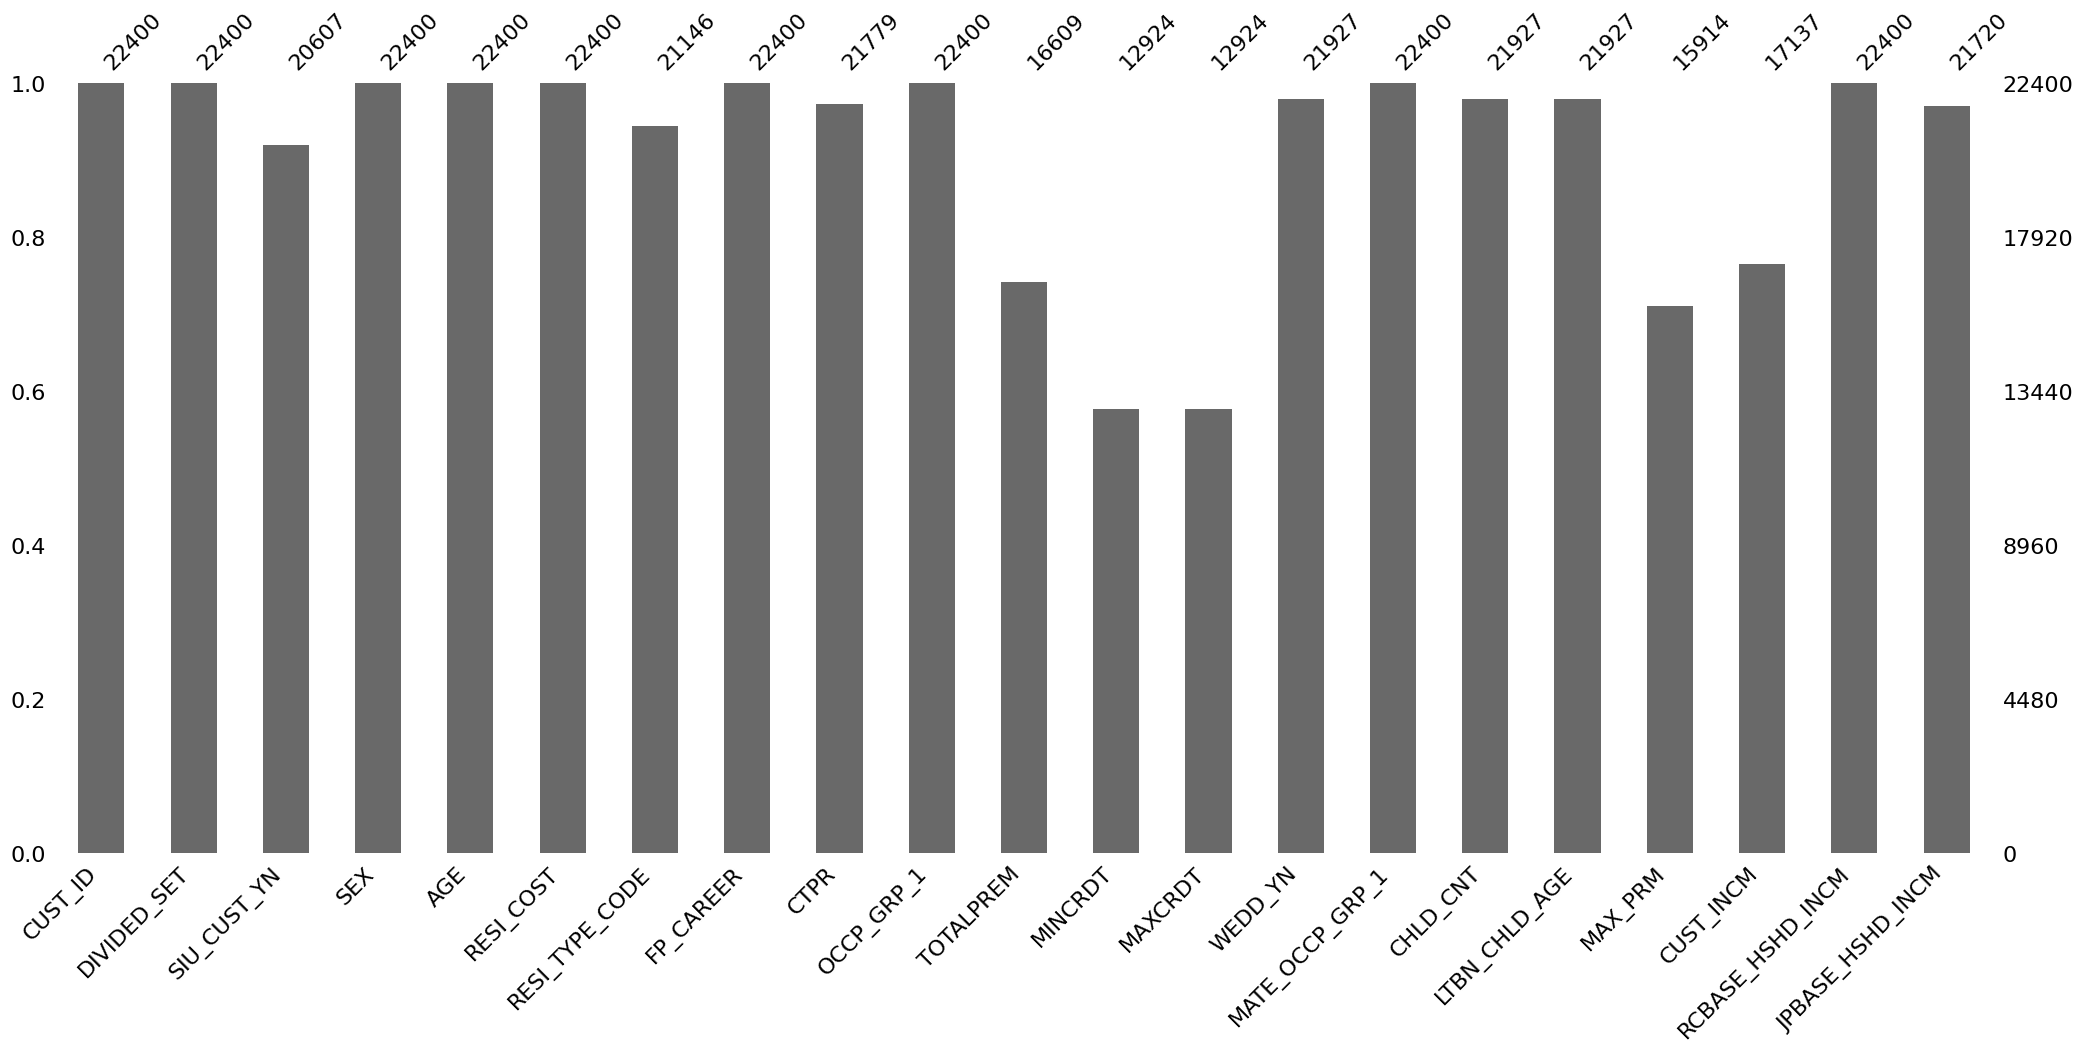

In [36]:
import missingno
missingno.bar(cust)
plt.show()

In [37]:
cust.isnull().sum()

CUST_ID                0
DIVIDED_SET            0
SIU_CUST_YN         1793
SEX                    0
AGE                    0
RESI_COST              0
RESI_TYPE_CODE      1254
FP_CAREER              0
CTPR                 621
OCCP_GRP_1             0
TOTALPREM           5791
MINCRDT             9476
MAXCRDT             9476
WEDD_YN              473
MATE_OCCP_GRP_1        0
CHLD_CNT             473
LTBN_CHLD_AGE        473
MAX_PRM             6486
CUST_INCM           5263
RCBASE_HSHD_INCM       0
JPBASE_HSHD_INCM     680
dtype: int64

### NULL값이 많은 MINCRDT, MAXCRDT 열 삭제

In [38]:
cust.drop(['MINCRDT', 'MAXCRDT'], axis=1, inplace=True)
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.0,0,8885.0


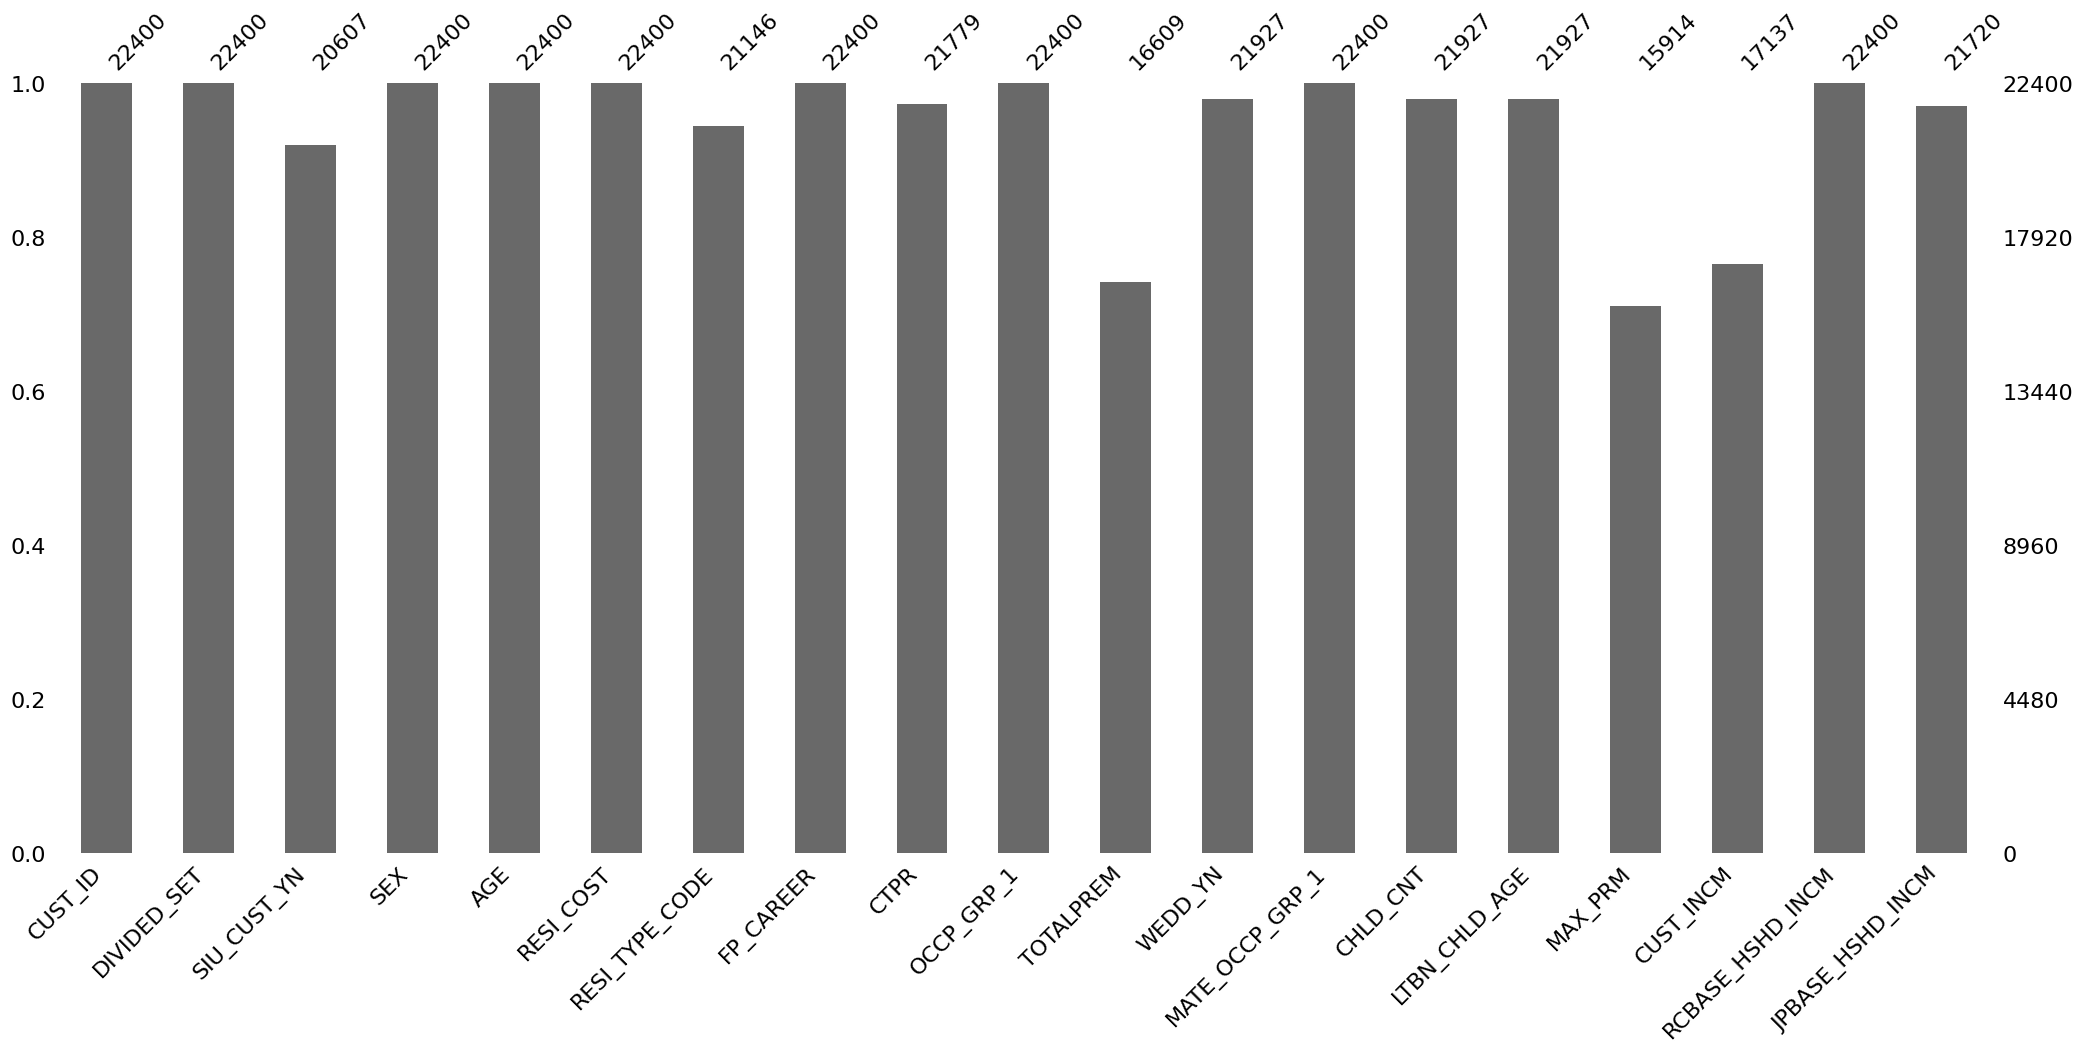

In [39]:
missingno.bar(cust)
plt.show()

### 개인소득 결측치 처리

In [40]:
cust[cust.CUST_INCM.isnull()].head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,NaN,4270,5914.0
5,6,1,N,1,6,6218,99.0,N,충남,사무직,22313040.0,Y,주부,1.0,3.0,82850.0,NaN,0,6449.0
10,13,1,Y,1,6,8140,50.0,N,경기,제조업,33261687.0,Y,서비스,0.0,0.0,483850.0,NaN,4066,NaN
13,17,1,N,1,6,14027,20.0,N,대구,서비스,10122595.0,Y,주부,0.0,0.0,229500.0,NaN,4538,5869.0
15,19,1,N,1,6,15833,20.0,N,경기,자영업,11323581.0,Y,주부,1.0,3.0,300000.0,NaN,5075,6120.0


In [41]:
occp_age_cust = cust.pivot_table(index=["AGE", "OCCP_GRP_1"], 
                                 values="CUST_INCM", aggfunc="mean")
occp_age_cust.head()

CUST_INCM
AGE OCCP_GRP_1             
2   1차산업        3208.333333
    n           2487.000000
    기타            10.167982
    사무직         2740.725979
    서비스         2773.720000

In [42]:
occp_age_cust["CUST_INCM"]

AGE  OCCP_GRP_1
2    1차산업          3208.333333
     n             2487.000000
     기타              10.167982
     사무직           2740.725979
     서비스           2773.720000
     자영업           2931.117647
     전문직           2761.718750
     제조업           2812.219512
     주부               0.000000
3    1차산업          3474.411765
     n             3534.750000
     기타             220.549828
     사무직           3571.076851
     서비스           3590.325167
     자영업           3954.316076
     전문직           3604.069243
     제조업           3569.818966
     주부               0.000000
4    1차산업          3969.931818
     n             4204.710526
     기타            2731.950000
     사무직           4673.625914
     서비스           4157.223301
     자영업           4723.804674
     전문직           4455.028694
     제조업           4291.350000
     주부               0.000000
5    1차산업          4145.708738
     n             4627.300000
     기타            3363.211429
     사무직           5502.984463
     서비스           4080

In [43]:
def fill_income(row):
    try:
        avg_income = occp_age_cust["CUST_INCM"][row.AGE][row.OCCP_GRP_1]
    except:
        avg_income = 0
    return avg_income

In [44]:
cust["CUST_INCM_NEW"] = None
cust.loc[cust.CUST_INCM.isnull(), "CUST_INCM_NEW"] = cust.loc[cust.CUST_INCM.isnull()].apply(fill_income, axis=1)

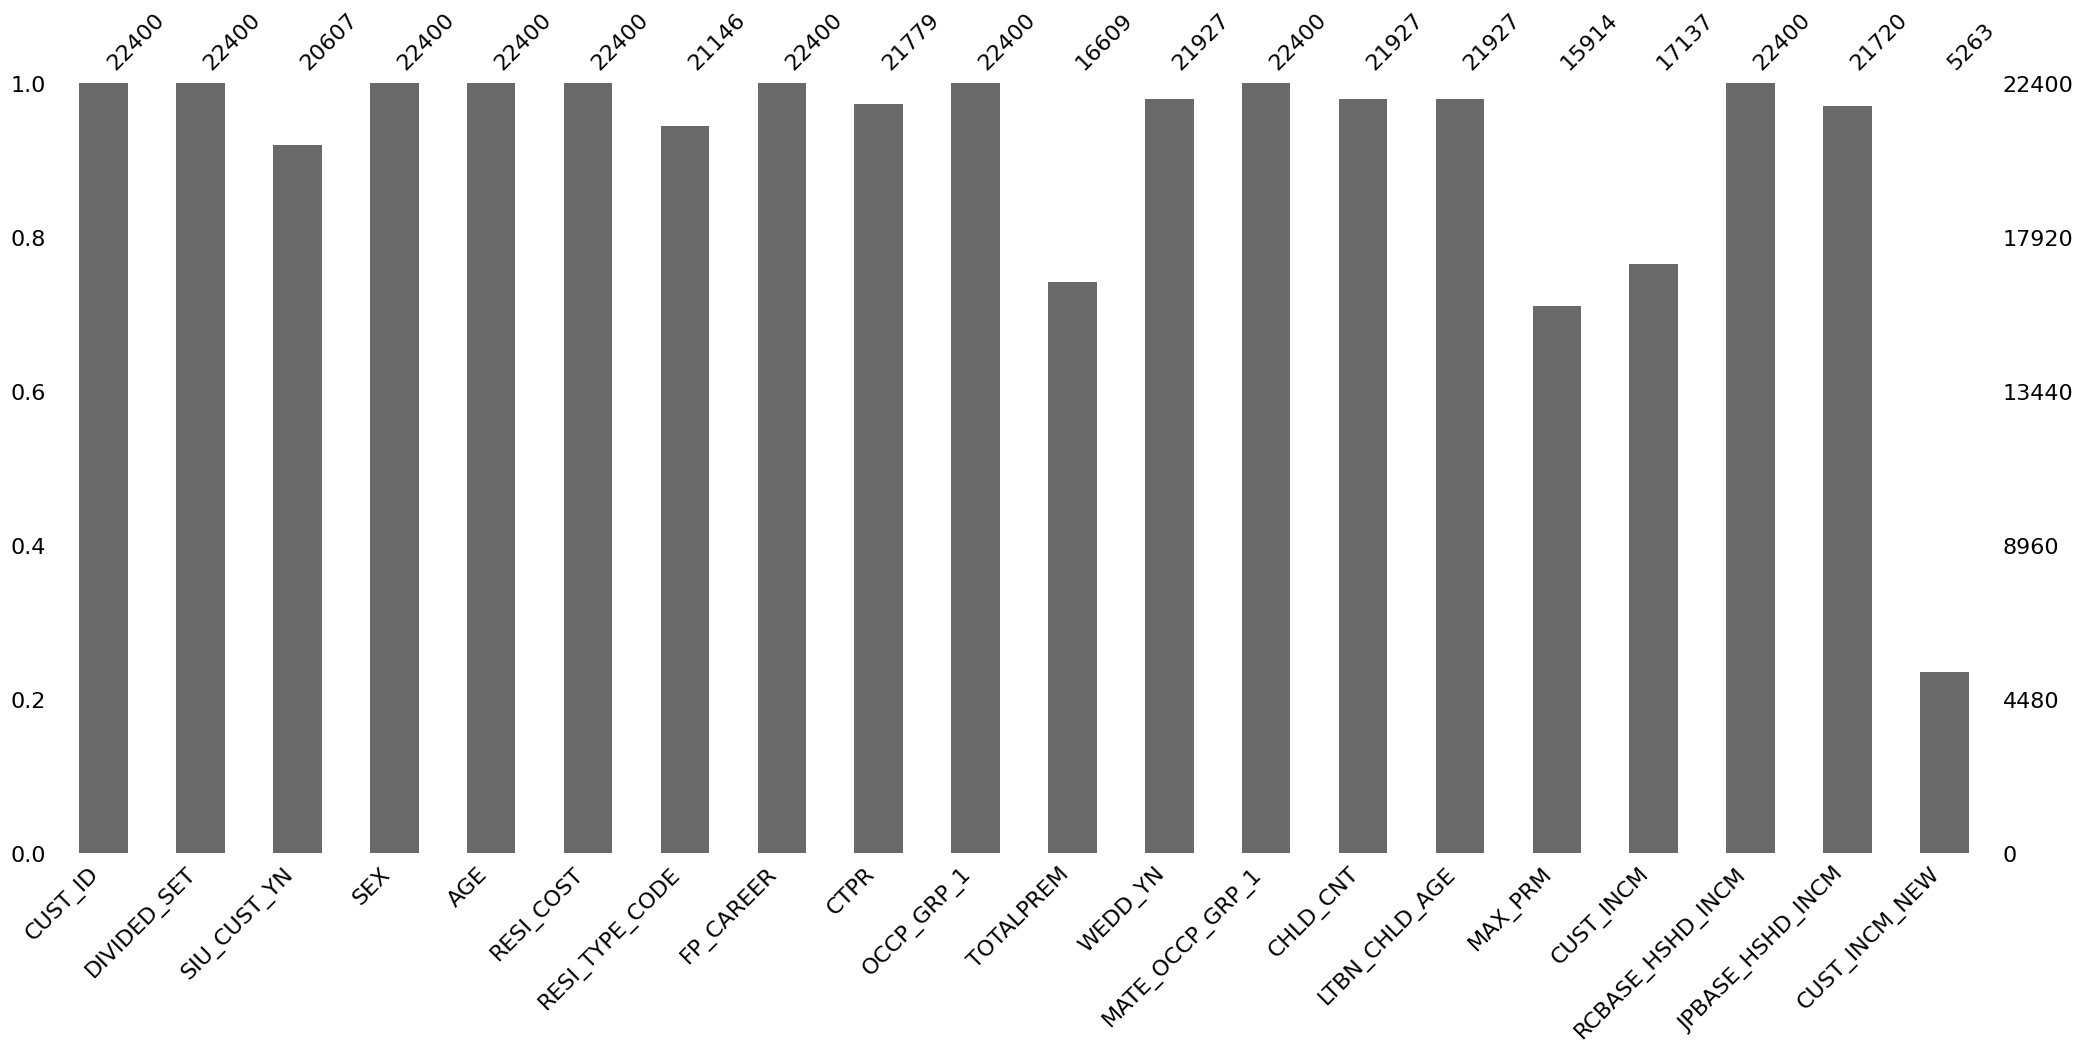

In [45]:
missingno.bar(cust)
plt.show()

In [46]:
cust.loc[cust.CUST_INCM.isnull(), "CUST_INCM"] = cust.loc[cust.CUST_INCM.isnull()].apply(fill_income, axis=1).copy()
del cust["CUST_INCM_NEW"]

In [47]:
cust.head(10)

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,N,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.000000,10094,11337.0
1,2,1,N,1,5,40000,20.0,N,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.000000,9143,6509.0
2,3,1,N,1,6,0,NaN,N,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.000000,0,4180.0
3,4,1,N,2,6,12861,40.0,Y,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,4813.837838,4270,5914.0
4,5,1,N,2,5,0,NaN,Y,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.000000,0,8885.0
5,6,1,N,1,6,6218,99.0,N,충남,사무직,22313040.0,Y,주부,1.0,3.0,82850.0,5403.133333,0,6449.0
6,7,1,Y,2,6,11388,30.0,N,서울,서비스,46522197.0,Y,n,1.0,2.0,482077.0,3611.000000,0,3611.0
7,8,1,N,1,5,86527,20.0,Y,서울,자영업,151085847.0,Y,자영업,1.0,2.0,10283415.0,6465.000000,12219,12063.0
8,9,1,N,1,5,22638,20.0,N,서울,전문직,3666050.0,Y,전문직,1.0,1.0,29.0,4975.000000,7553,9821.0
9,12,1,N,1,5,37222,20.0,N,서울,전문직,135719262.0,Y,전문직,2.0,2.0,724768.0,8780.000000,10466,13858.0


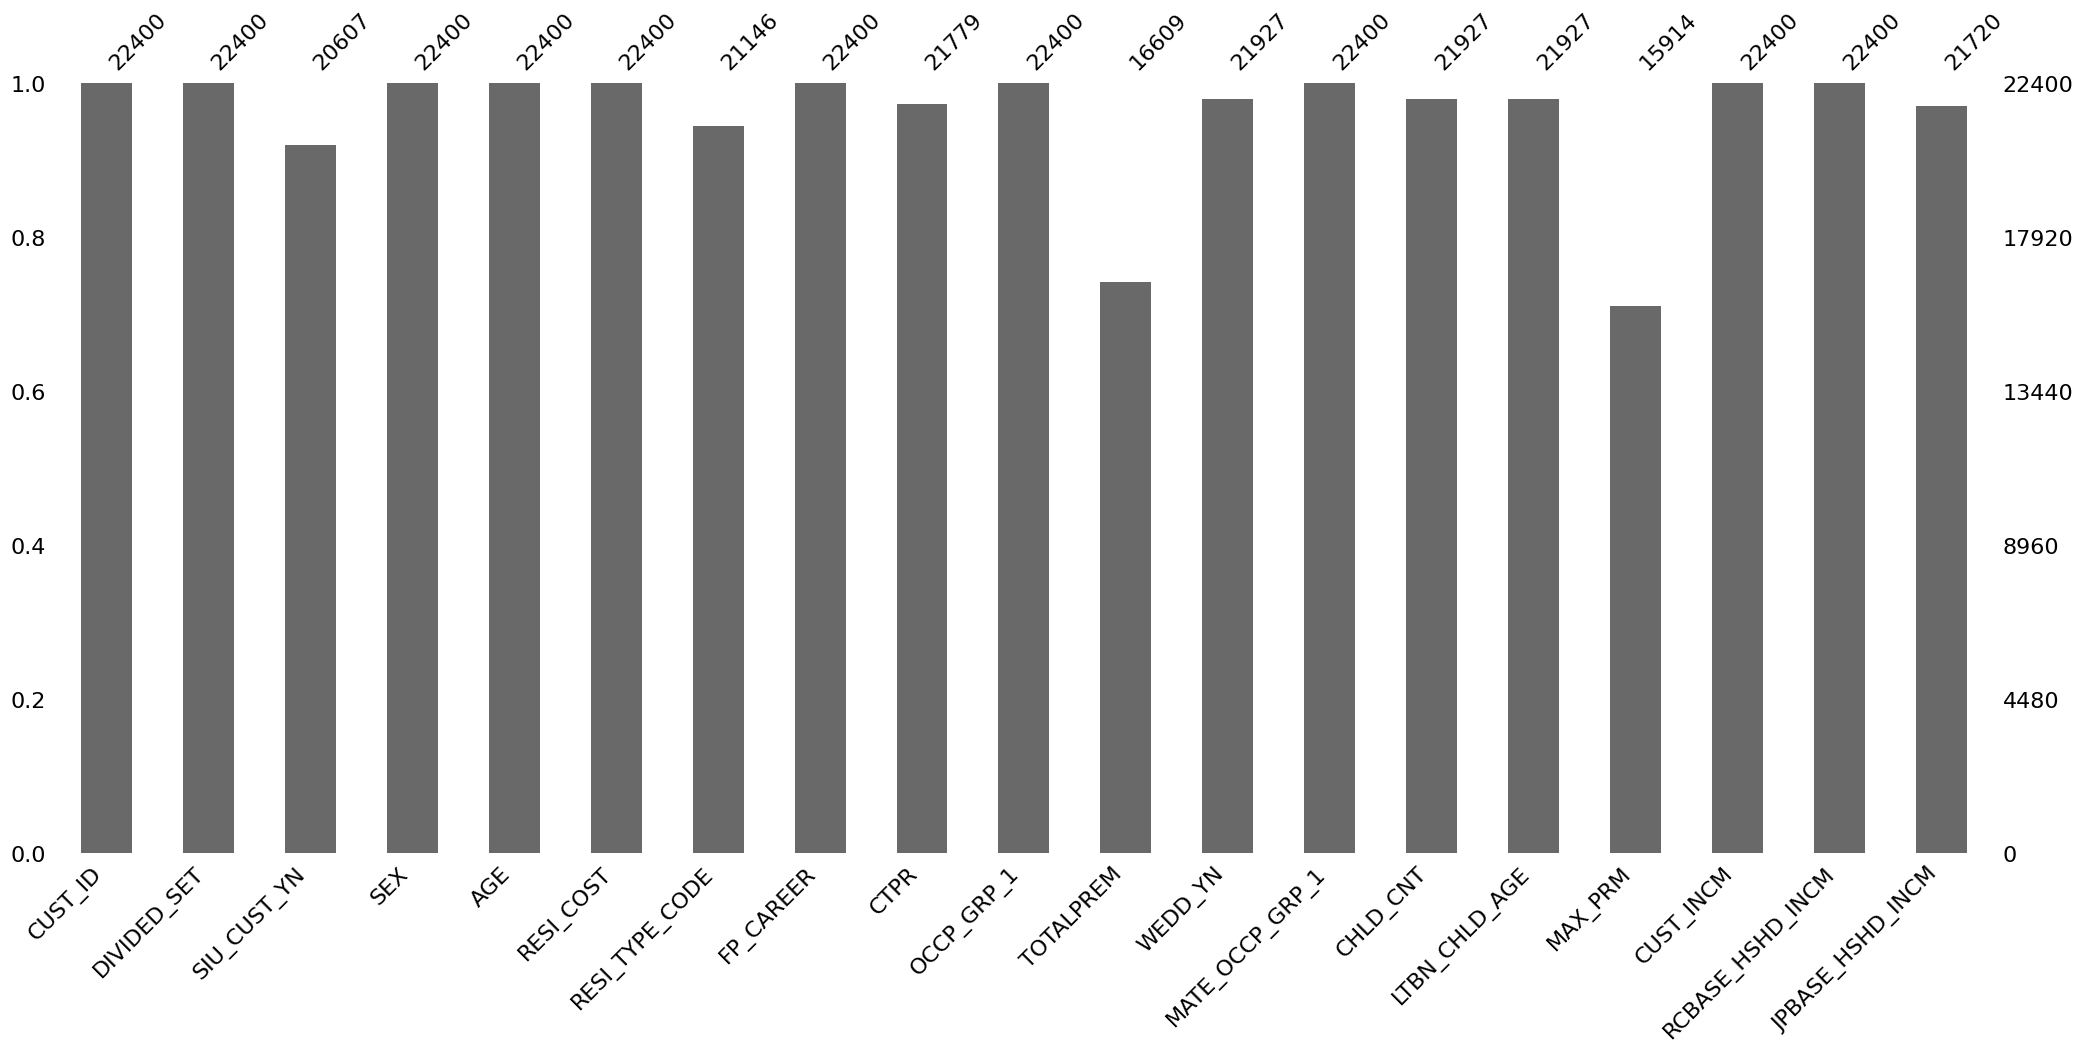

In [48]:
missingno.bar(cust)
plt.show()

### 가구 소득 결측치 처리

In [49]:
avg_income_by_job = cust.pivot_table(index=["OCCP_GRP_1"], 
                                     values=["JPBASE_HSHD_INCM"], 
                                     aggfunc="mean")
avg_income_by_job

,JPBASE_HSHD_INCM
OCCP_GRP_1,
1차산업,4256.579937
n,4807.235294
기타,4379.457519
사무직,5529.133980
서비스,5464.250453
자영업,6466.752099
전문직,5979.159369
제조업,5403.936282
주부,4744.600627


In [50]:
def fill_jpbase_incm(row):
    try:
        avg_jpbase = avg_income_by_job["JPBASE_HSHD_INCM"][row.OCCP_GRP_1]
    except:
        avg_jpbase = 0
    return avg_jpbase


In [51]:
cust['JPBASE_NEW'] = None
cust.loc[cust.JPBASE_HSHD_INCM.isnull(), 'JPBASE_NEW'] = cust.loc[cust['JPBASE_HSHD_INCM'].isnull()].apply(fill_jpbase_incm, axis=1)

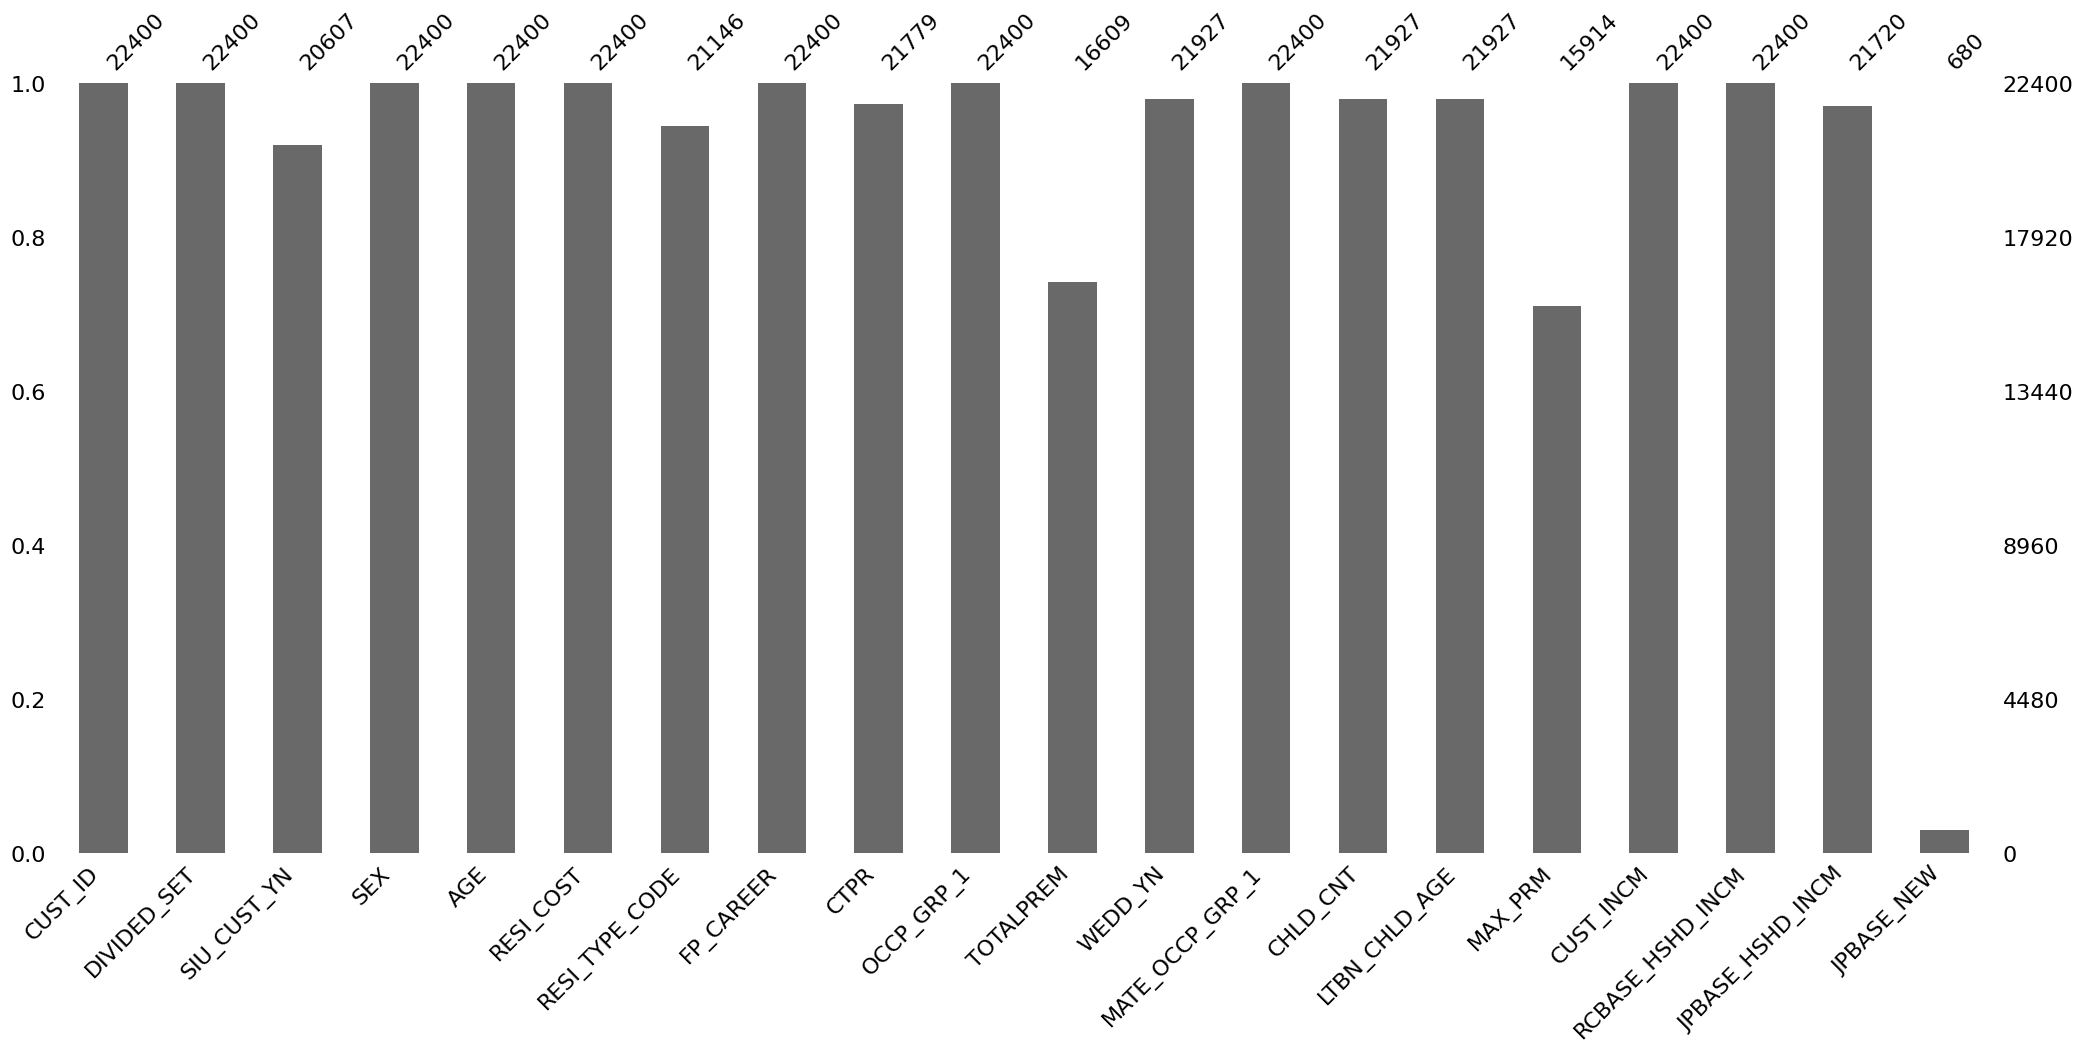

In [52]:
missingno.bar(cust)
plt.show()

In [53]:
cust.loc[cust.JPBASE_HSHD_INCM.isnull(),'JPBASE_HSHD_INCM'] = \
cust[cust['JPBASE_HSHD_INCM'].isnull()].apply(fill_jpbase_incm, axis=1)
del cust["JPBASE_NEW"]

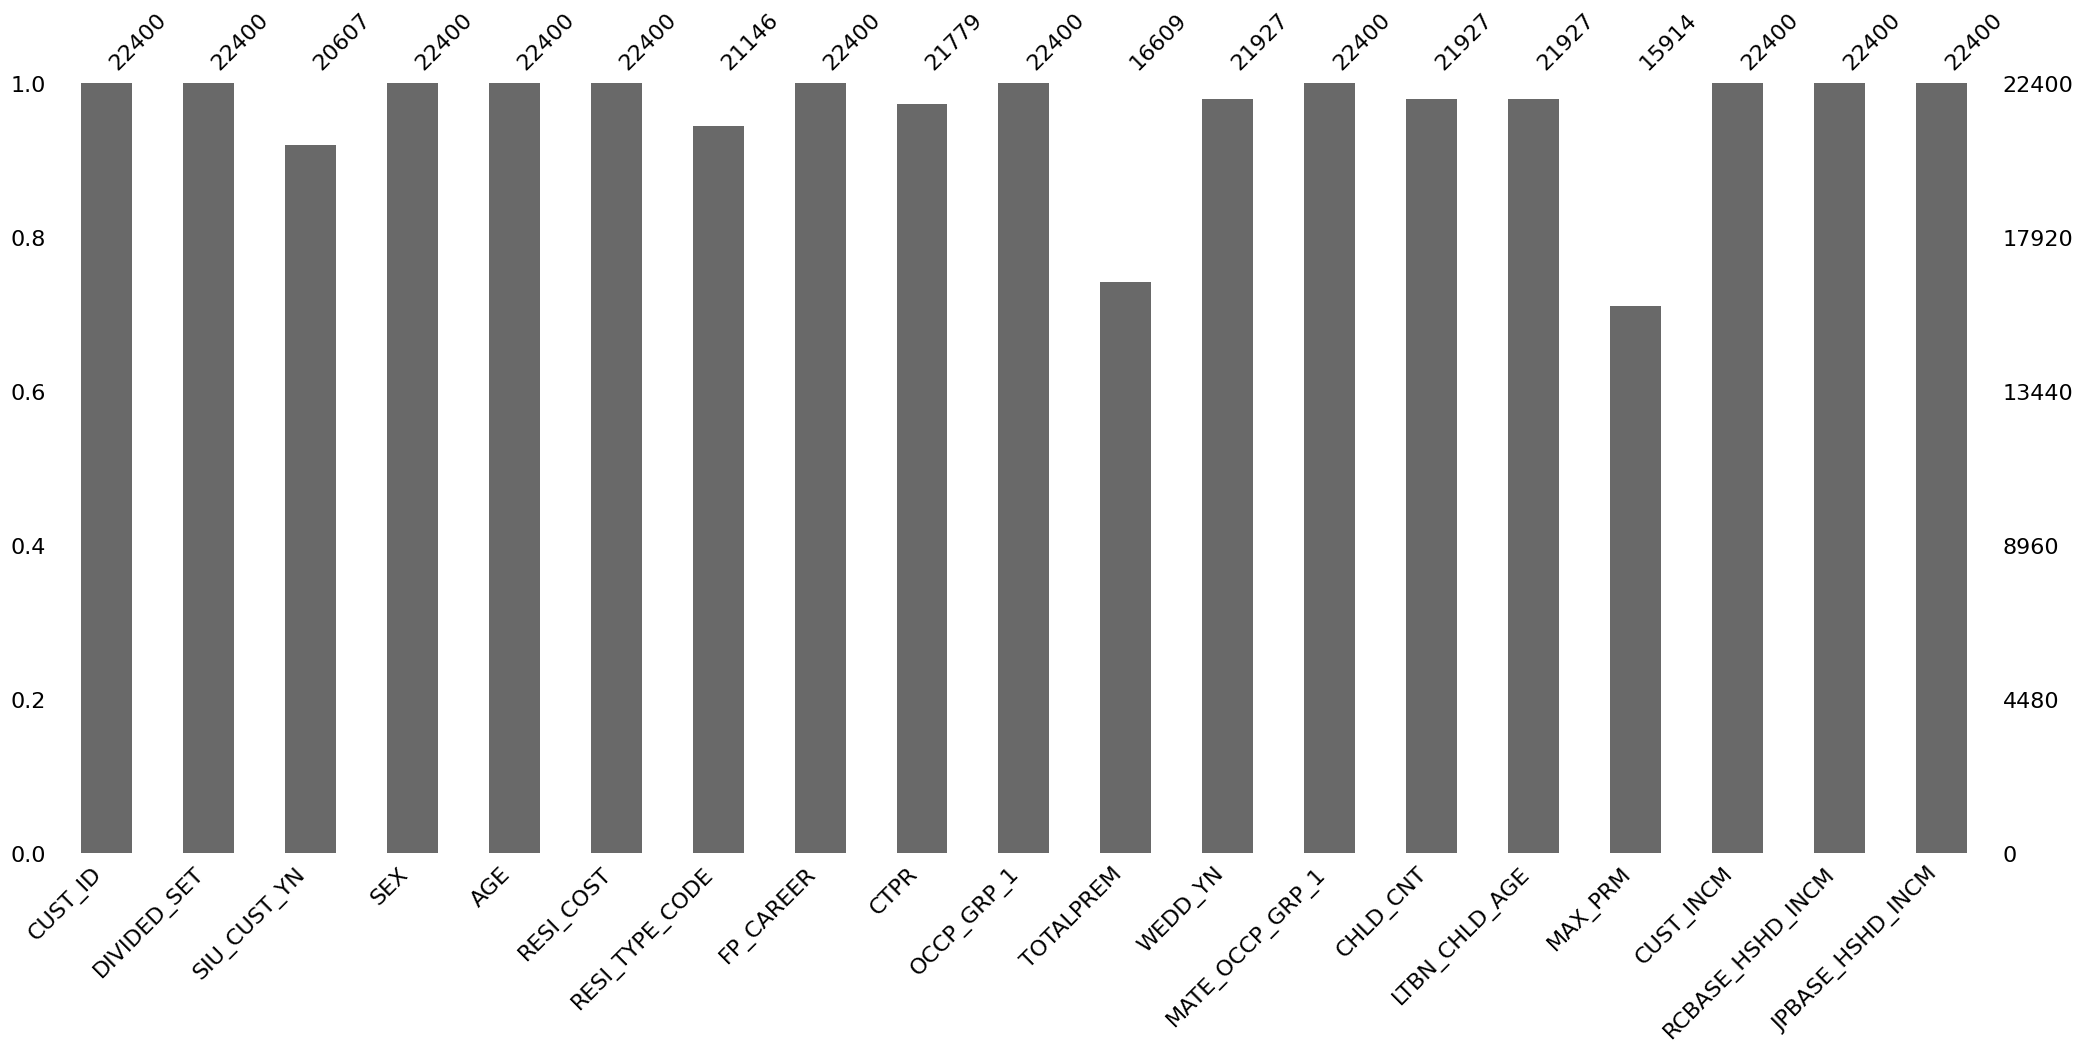

In [54]:
missingno.bar(cust)
plt.show()

### 기타 변수 결측치 처리

In [55]:
cust['RESI_TYPE_CODE'].value_counts()

RESI_TYPE_CODE
20.0    10677
12.0     2549
30.0     2379
11.0     1797
40.0     1432
99.0     1341
13.0      816
50.0       69
60.0       55
70.0       31
Name: count, dtype: int64

In [56]:
# RESI_TYPE_CODE, CTPR : 결측치는 최빈값으로
cust['RESI_TYPE_CODE'] = cust['RESI_TYPE_CODE'].fillna(20)
cust['CTPR'] = cust['CTPR'].fillna('경기')

In [57]:
# WEDD_YN : 결측치는 N으로
cust['WEDD_YN'] = cust['WEDD_YN'].fillna('N')

In [58]:
# LBTN_CHLD_AGE, CHLD_CNT, TOTALPREM, MAX_PRM : 결측치는 0으로
cust['LTBN_CHLD_AGE'] = cust['LTBN_CHLD_AGE'].fillna(0)
cust['CHLD_CNT'] = cust['CHLD_CNT'].fillna(0)
cust['TOTALPREM'] = cust['TOTALPREM'].fillna(0)
cust['MAX_PRM'] = cust['MAX_PRM'].fillna(0)

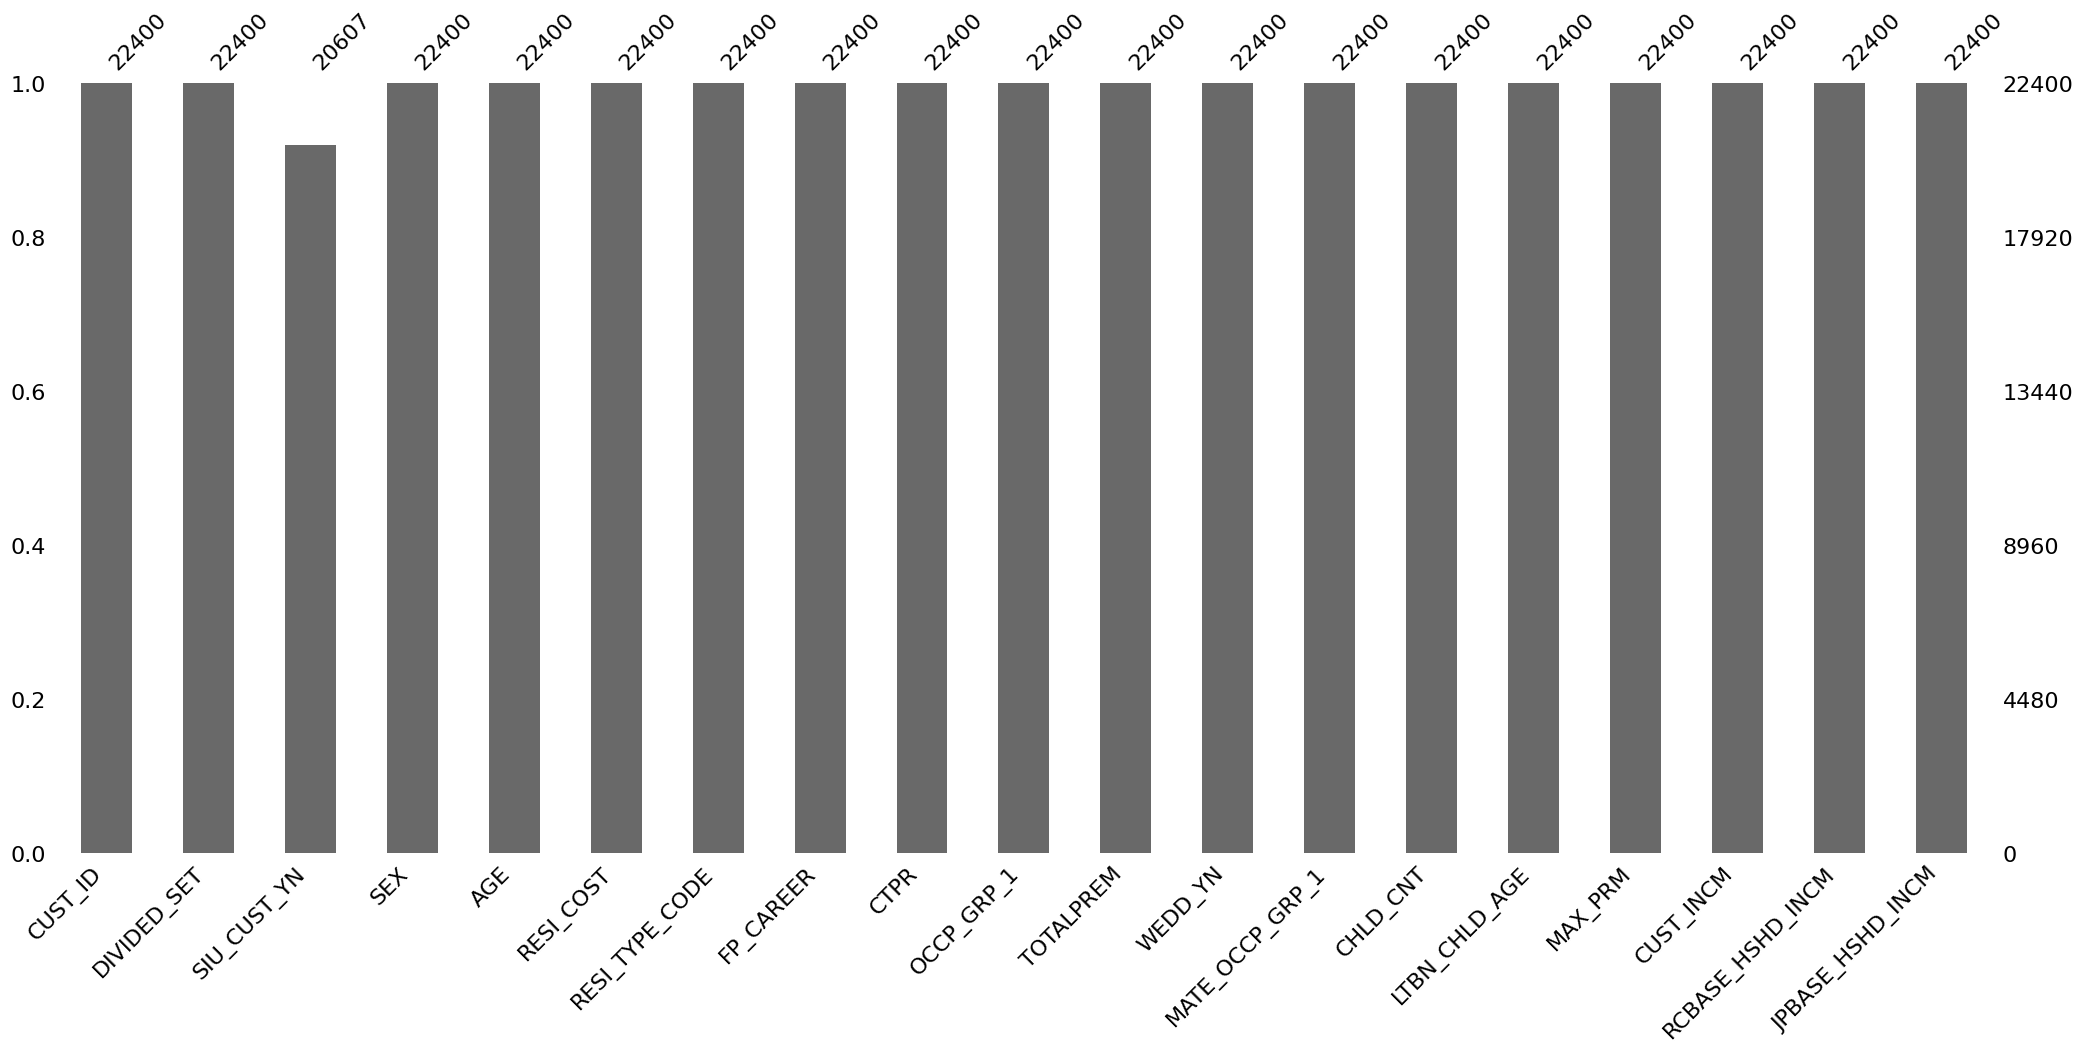

In [59]:
missingno.bar(cust)
plt.show()

### 중간 데이터 저장

In [60]:
cust.to_csv("CUST_DATA_결측치처리.csv", index=False, encoding="utf-8-sig")

### 분석에 유의미하지 않다고 판단하는 열(FP_CAREER) DROP

In [61]:
cust.drop("FP_CAREER", axis=1, inplace=True)
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,CTPR,OCCP_GRP_1,TOTALPREM,WEDD_YN,MATE_OCCP_GRP_1,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,4,21111,20.0,충북,사무직,146980441.0,Y,사무직,2.0,1.0,319718.0,4879.000000,10094,11337.0
1,2,1,N,1,5,40000,20.0,서울,사무직,94600109.0,Y,주부,2.0,1.0,341341.0,6509.000000,9143,6509.0
2,3,1,N,1,6,0,20.0,서울,서비스,18501269.0,N,n,0.0,0.0,131300.0,4180.000000,0,4180.0
3,4,1,N,2,6,12861,40.0,경기,자영업,317223657.0,N,n,0.0,0.0,1493184.0,4813.837838,4270,5914.0
4,5,1,N,2,5,0,20.0,광주,자영업,10506072.0,Y,사무직,3.0,1.0,166760.0,3894.000000,0,8885.0


### 카테고리 변수 원-핫 인코딩

In [62]:
category = ["SEX", "RESI_TYPE_CODE", "CTPR", "OCCP_GRP_1", "WEDD_YN", "MATE_OCCP_GRP_1"]
dummy = pd.get_dummies(cust, columns=category)
dummy.head() 

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,AGE,RESI_COST,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SEX_1,SEX_2,RESI_TYPE_CODE_11.0,RESI_TYPE_CODE_12.0,RESI_TYPE_CODE_13.0,RESI_TYPE_CODE_20.0,RESI_TYPE_CODE_30.0,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,CTPR_강원,CTPR_경기,CTPR_경남,CTPR_경북,CTPR_광주,CTPR_대구,CTPR_대전,CTPR_부산,CTPR_서울,CTPR_세종,CTPR_울산,CTPR_인천,CTPR_전남,CTPR_전북,CTPR_제주,CTPR_충남,CTPR_충북,OCCP_GRP_1_1차산업,OCCP_GRP_1_n,OCCP_GRP_1_기타,OCCP_GRP_1_사무직,OCCP_GRP_1_서비스,OCCP_GRP_1_자영업,OCCP_GRP_1_전문직,OCCP_GRP_1_제조업,OCCP_GRP_1_주부,WEDD_YN_N,WEDD_YN_Y,MATE_OCCP_GRP_1_1차산업,MATE_OCCP_GRP_1_n,MATE_OCCP_GRP_1_기타,MATE_OCCP_GRP_1_사무직,MATE_OCCP_GRP_1_서비스,MATE_OCCP_GRP_1_자영업,MATE_OCCP_GRP_1_전문직,MATE_OCCP_GRP_1_제조업,MATE_OCCP_GRP_1_주부
0,1,1,N,4,21111,146980441.0,2.0,1.0,319718.0,4879.000000,10094,11337.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1,2,1,N,5,40000,94600109.0,2.0,1.0,341341.0,6509.000000,9143,6509.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,3,1,N,6,0,18501269.0,0.0,0.0,131300.0,4180.000000,0,4180.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,4,1,N,6,12861,317223657.0,0.0,0.0,1493184.0,4813.837838,4270,5914.0,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False
4,5,1,N,5,0,10506072.0,3.0,1.0,166760.0,3894.000000,0,8885.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False


### 원-핫 인코딩 데이터 저장

In [63]:
dummy.to_csv("CUST_DATA_더미코딩후.csv", index=False, 
              encoding="utf-8-sig")
del dummy

## CLAIM_DATA로부터 파생변수 만들기

    - 결측치가 많은 변수 삭제 및 DATE 관련 변수 삭제
    - HOST_DAYS : 각 고객별 평균 입원 일수
    - HEED_HOSP : 각 고객별 유의병원 출입여부
    - CLAIM_COUNT : 각 고객별 청구횟수
    - DOC_SIU_RATIO : 담당의사의 사기비율 max(사기수/전체청구수)
    - HOSP_SIU_RATIO : 병원의 사기비율 max(사기수/전체청구수)
    - HOSP_DOC_SIU : DOC_SIU_RATIO * HOSP_SIU_RATIO
    - ACCI_RATIO : ACCI_DVSN 별 / CLAIM_COUNT
    - 사고원인(ACCI_DVSN)과 청구코드(DMND_RESN_CODE)를 이용한 파생변수

In [64]:
import pandas as pd
cust = pd.read_csv("CUST_DATA_더미코딩후.csv", encoding="utf-8-sig")
claim = pd.read_csv("CLAIM_DATA.csv", encoding="utf-16")
claim.head()

,CUST_ID,POLY_NO,ACCI_OCCP_GRP1,ACCI_OCCP_GRP2,CHANG_FP_YN,CNTT_RECP_SQNO,RECP_DATE,ORIG_RESN_DATE,RESN_DATE,CRNT_PROG_DVSN,ACCI_DVSN,CAUS_CODE,CAUS_CODE_DTAL,DSAS_NAME,DMND_RESN_CODE,DMND_RSCD_SQNO,HOSP_OTPA_STDT,HOSP_OTPA_ENDT,RESL_CD1,RESL_NM1,VLID_HOSP_OTDA,HOUSE_HOSP_DIST,HOSP_CODE,ACCI_HOSP_ADDR,HOSP_SPEC_DVSN,CHME_LICE_NO,PAYM_DATE,DMND_AMT,PAYM_AMT,PMMI_DLNG_YN,SELF_CHAM,NON_PAY,TAMT_SFCA,PATT_CHRG_TOTA,DSCT_AMT,COUNT_TRMT_ITEM,DCAF_CMPS_XCPA,NON_PAY_RATIO,HEED_HOSP_YN
0,5936,1365,8.기타,학생,Y,2006011200001,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,20000,20000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
1,5936,6151,8.기타,학생,Y,2006011200002,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,30000,30000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
2,5936,10364,8.기타,학생,Y,2006011200003,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,40000,40000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
3,1043,1247,1.주부,주부,N,2006011200004,20060112,20060105,20060105,23,3,A09,#,기타세균성창자감염|손목및손의2도화상|피부염,2,1,20060105.0,20060110.0,A09,감염성 및 상세불명 기원의 기타위장염 및 결장염,6,NaN,12537.0,NaN,95.0,17647,20060113.0,60000,60000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
4,8545,11236,1.주부,주부,Y,2006011200005,20060112,20060110,20060110,11,3,I83,#,좌측하지정맥류혈관발거술|레이저소작술,5,1,NaN,NaN,I83,다리(하지)의 정맥류,0,4.88,2305.0,경기,30.0,25697,20060112.0,200000,200000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N


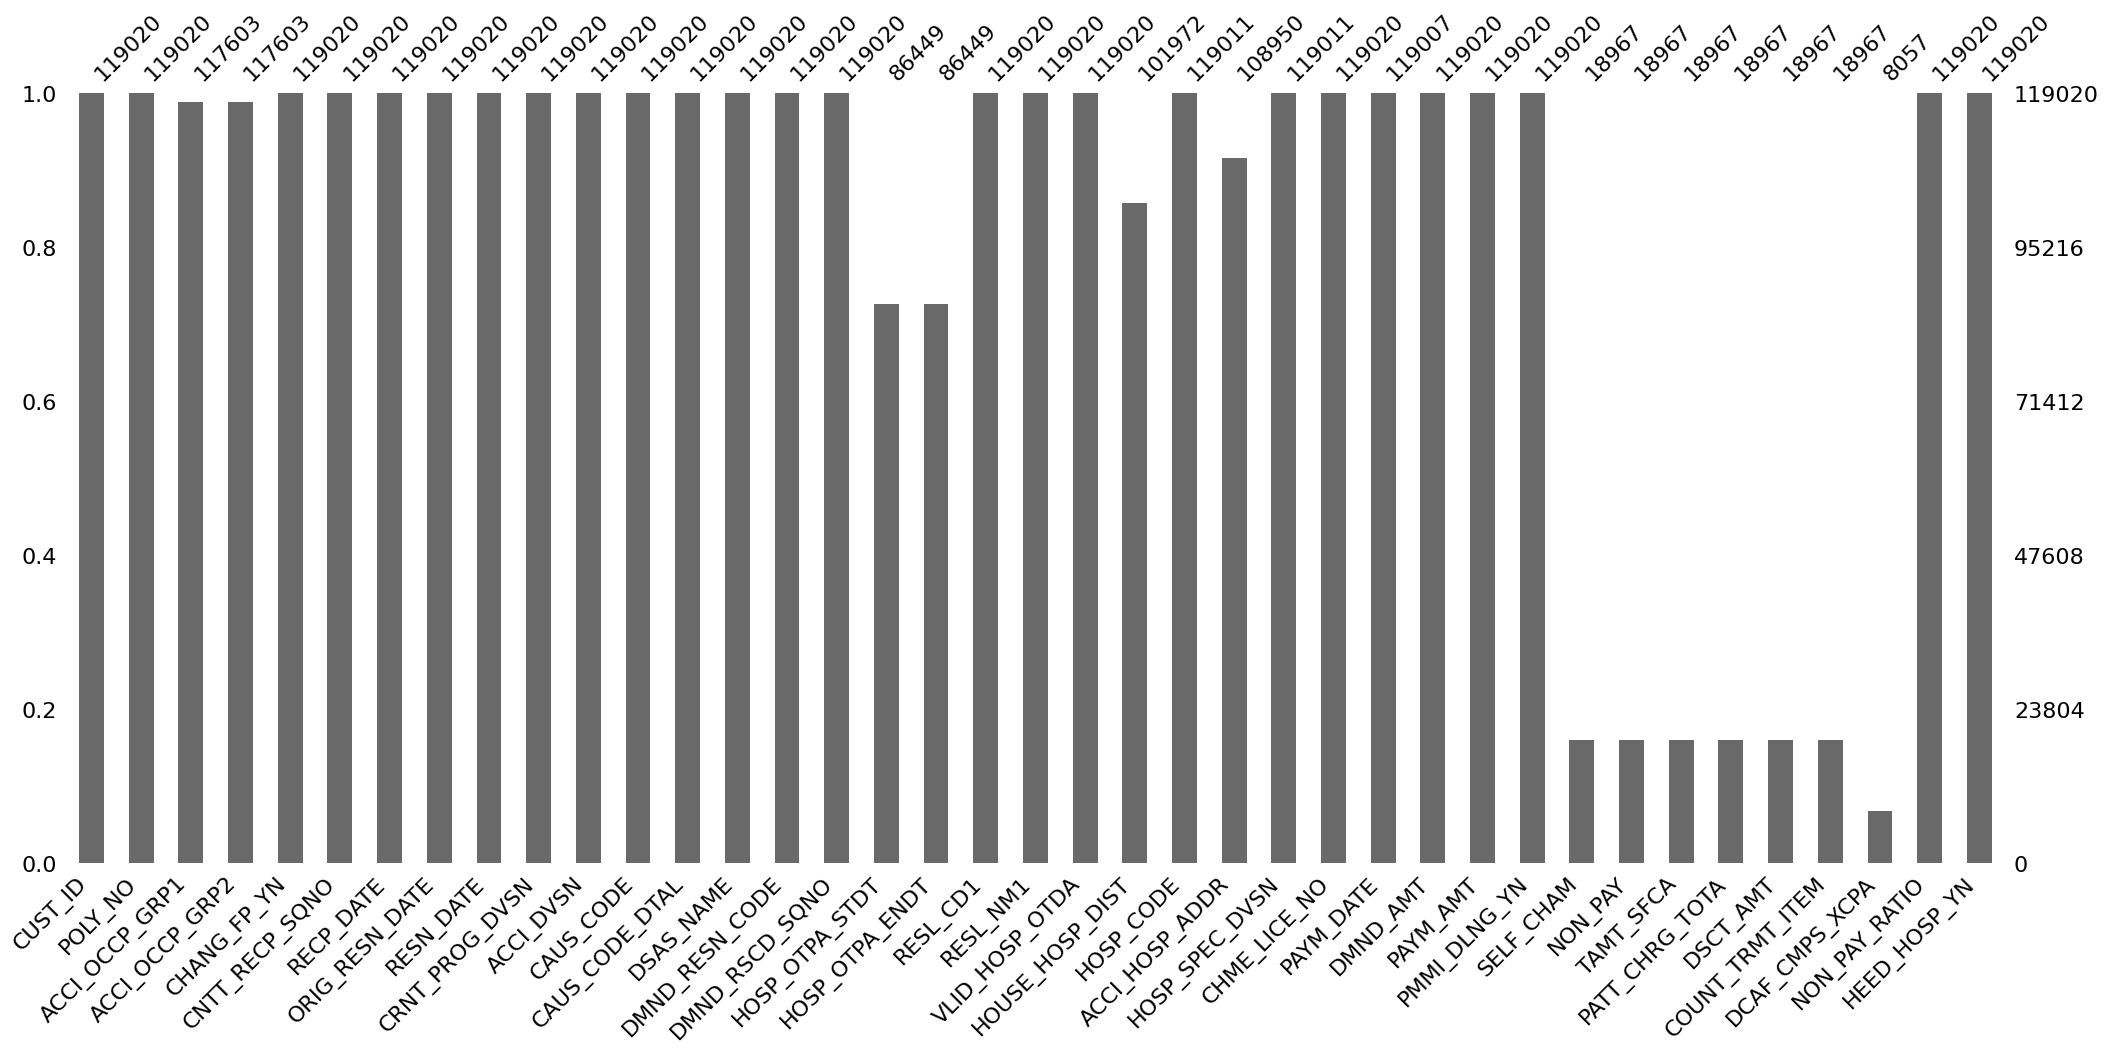

In [65]:
missingno.bar(claim)
plt.show()

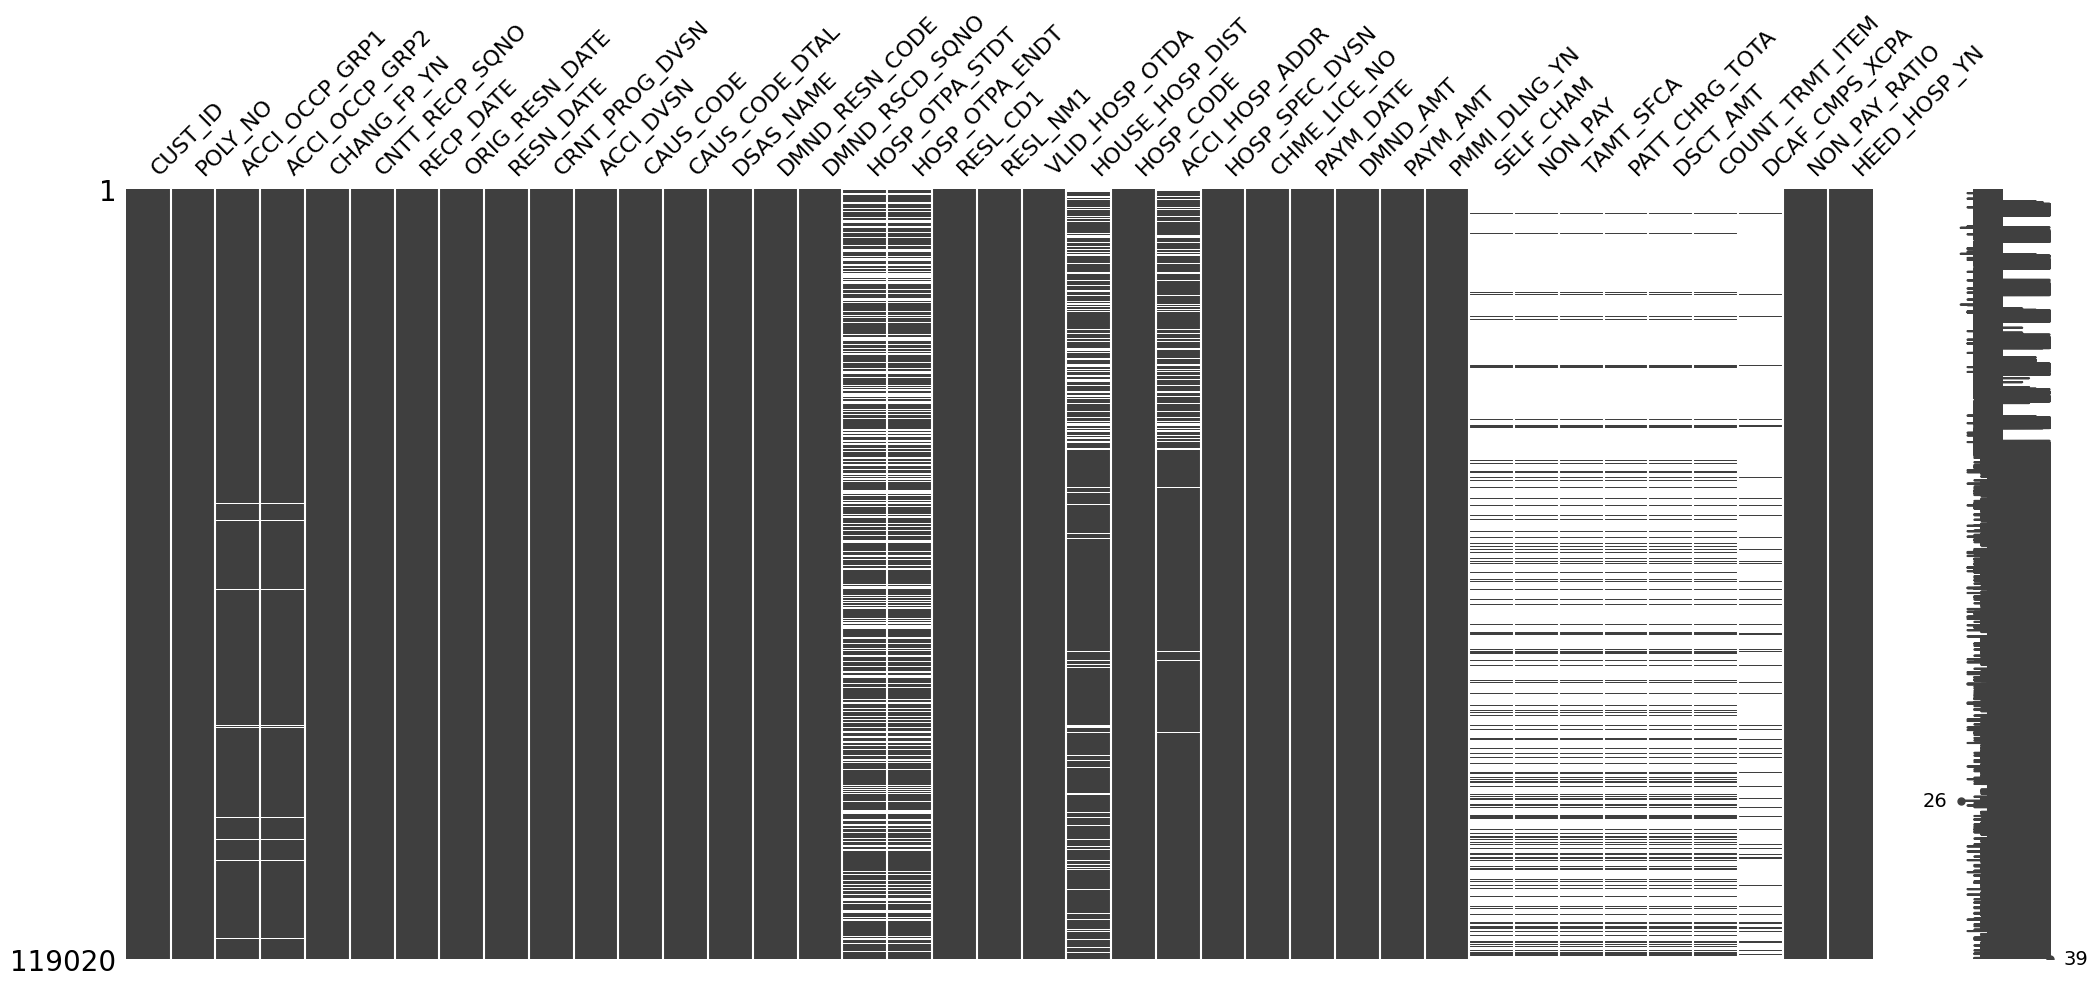

In [66]:
missingno.matrix(claim)
plt.show()

### 결측치가 많은 변수 삭제 및 날짜 관련 변수 삭제

In [67]:
# NULL 값 많은 변수 삭제
claim.drop(['SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 
            'DSCT_AMT', 'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA'], 
           axis=1, inplace=True)

# DATE 변수 삭제
claim.drop(['HOSP_OTPA_STDT', 'HOSP_OTPA_ENDT'], axis=1, inplace=True)

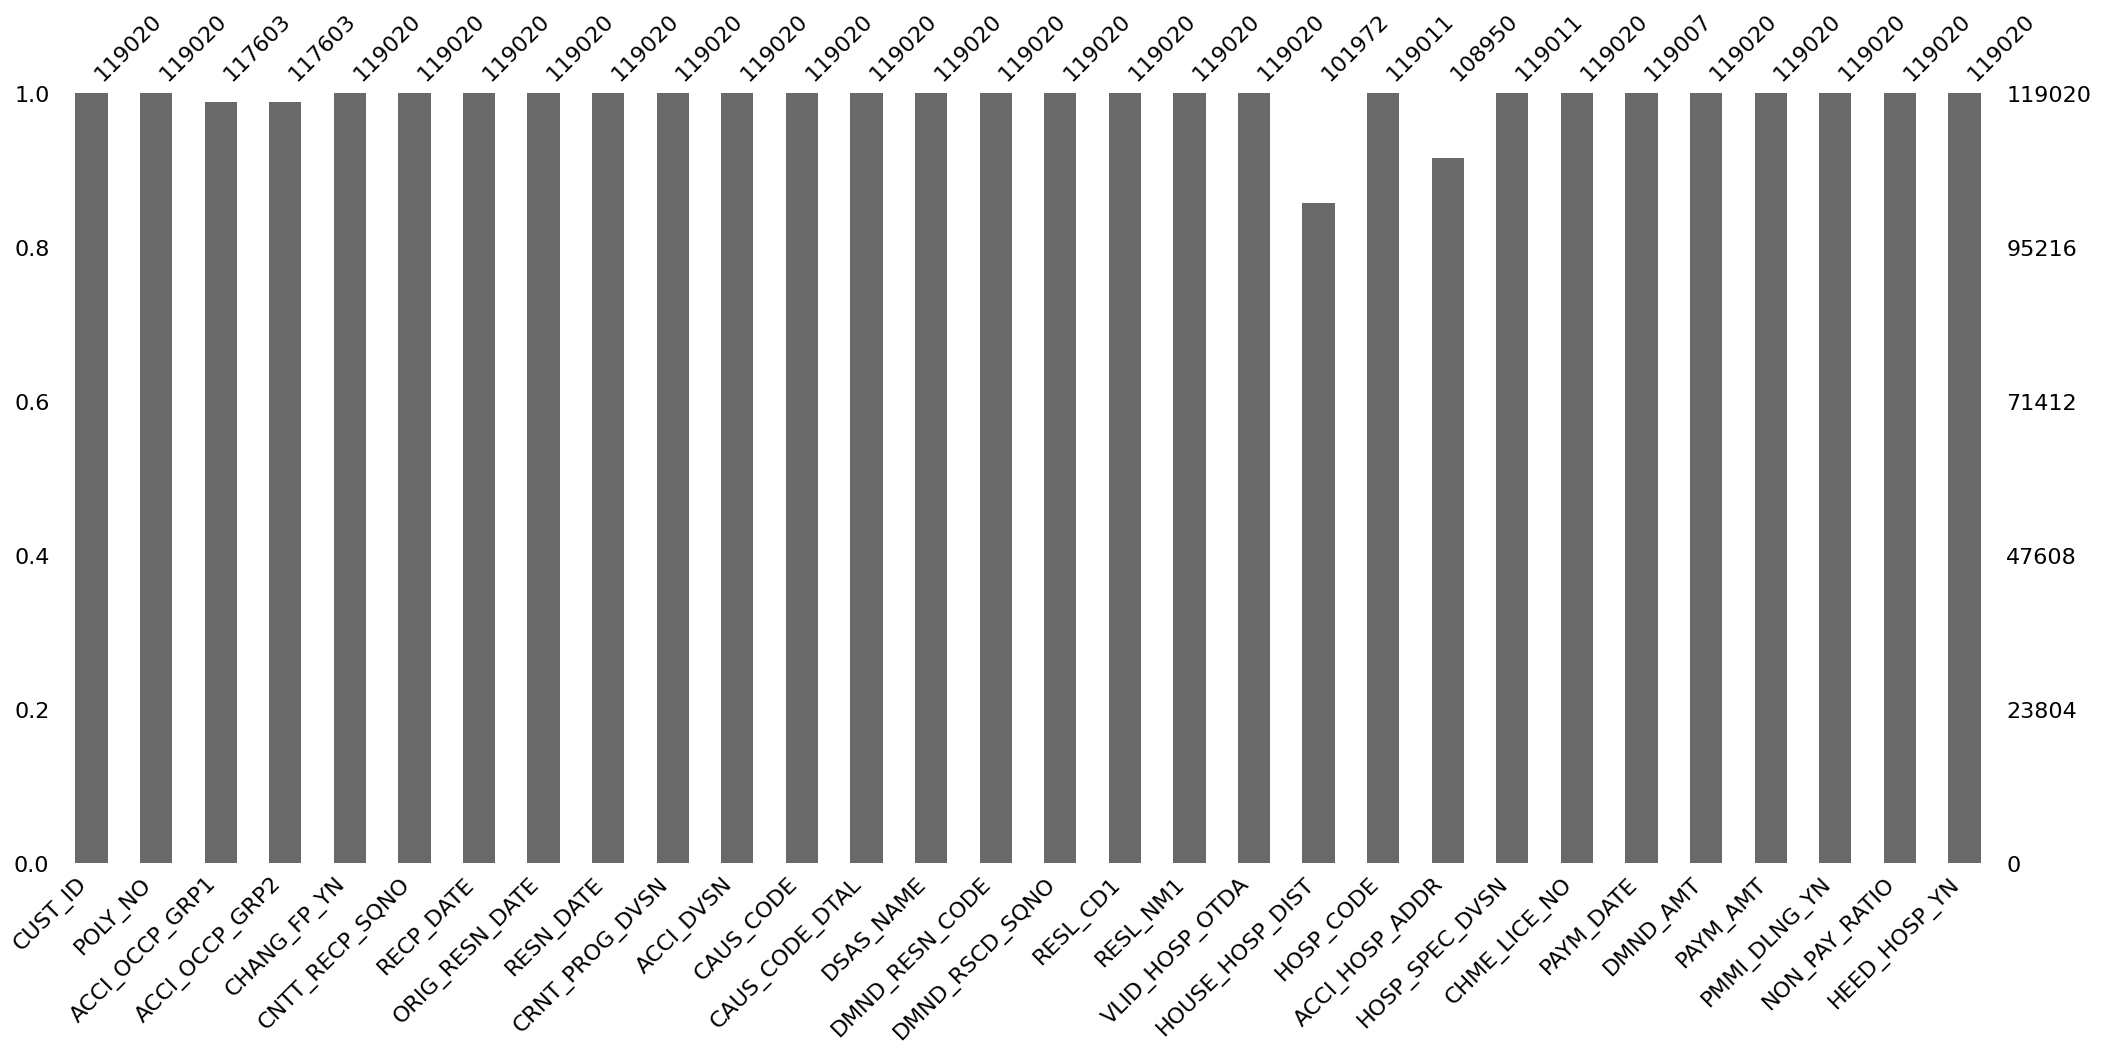

In [68]:
missingno.bar(claim)
plt.show()

### HOSP_DAYS : 각 고객별 평균 입원 일수

In [69]:
claim_df = claim.pivot_table(index='CUST_ID', values='VLID_HOSP_OTDA', 
                             aggfunc='mean')
claim_df.reset_index(inplace=True)
cust = pd.merge(cust, claim_df, how='left', on='CUST_ID')
cust.rename(columns={"VLID_HOSP_OTDA": "HOSP_DAYS"}, inplace=True) 
cust.loc[:, ["CUST_ID","HOSP_DAYS"]].head(10)

,CUST_ID,HOSP_DAYS
0,1,1.250000
1,2,2.666667
2,3,16.000000
3,4,0.000000
4,5,25.000000
5,6,2.000000
6,7,32.444444
7,8,2.100000
8,9,1.500000
9,12,5.000000


### HEED_HOSP : 각 고객별 유의병원 출입여부

In [70]:
id_heed = claim[claim['HEED_HOSP_YN']=='Y']['CUST_ID'].unique()
id_heed

array([15218,  2657, 19568, ...,  7768,  3853, 17945], dtype=int64)

In [71]:
cust['HEED_HOSP'] = np.nan
cust.loc[cust['CUST_ID'].isin(id_heed), 'HEED_HOSP'] = 1
cust['HEED_HOSP'] = cust['HEED_HOSP'].fillna(0)
cust['HEED_HOSP'].value_counts()

HEED_HOSP
0.0    21224
1.0     1176
Name: count, dtype: int64

### 고객별 청구횟수

In [72]:
청구횟수 = claim.pivot_table(index='CUST_ID', values='POLY_NO', 
                             aggfunc='count').reset_index()
청구횟수.columns = ['CUST_ID', 'CLAIM_COUNT']
cust = pd.merge(cust, 청구횟수, on='CUST_ID', how='left')

In [73]:
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,AGE,RESI_COST,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SEX_1,SEX_2,RESI_TYPE_CODE_11.0,RESI_TYPE_CODE_12.0,RESI_TYPE_CODE_13.0,RESI_TYPE_CODE_20.0,RESI_TYPE_CODE_30.0,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,CTPR_강원,CTPR_경기,CTPR_경남,CTPR_경북,CTPR_광주,CTPR_대구,CTPR_대전,CTPR_부산,CTPR_서울,CTPR_세종,CTPR_울산,CTPR_인천,CTPR_전남,CTPR_전북,CTPR_제주,CTPR_충남,CTPR_충북,OCCP_GRP_1_1차산업,OCCP_GRP_1_n,OCCP_GRP_1_기타,OCCP_GRP_1_사무직,OCCP_GRP_1_서비스,OCCP_GRP_1_자영업,OCCP_GRP_1_전문직,OCCP_GRP_1_제조업,OCCP_GRP_1_주부,WEDD_YN_N,WEDD_YN_Y,MATE_OCCP_GRP_1_1차산업,MATE_OCCP_GRP_1_n,MATE_OCCP_GRP_1_기타,MATE_OCCP_GRP_1_사무직,MATE_OCCP_GRP_1_서비스,MATE_OCCP_GRP_1_자영업,MATE_OCCP_GRP_1_전문직,MATE_OCCP_GRP_1_제조업,MATE_OCCP_GRP_1_주부,HOSP_DAYS,HEED_HOSP,CLAIM_COUNT
0,1,1,N,4,21111,146980441.0,2.0,1.0,319718.0,4879.000000,10094,11337.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,1.250000,0.0,4
1,2,1,N,5,40000,94600109.0,2.0,1.0,341341.0,6509.000000,9143,6509.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,2.666667,0.0,3
2,3,1,N,6,0,18501269.0,0.0,0.0,131300.0,4180.000000,0,4180.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,16.000000,0.0,1
3,4,1,N,6,12861,317223657.0,0.0,0.0,1493184.0,4813.837838,4270,5914.0,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,0.000000,0.0,9
4,5,1,N,5,0,10506072.0,3.0,1.0,166760.0,3894.000000,0,8885.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,25.000000,0.0,1


### DOC_SIU_RATIO : 의사별 사기비율

In [74]:
# 의사별 사기수/전체청구수
data = pd.merge(claim, cust[['CUST_ID', 'SIU_CUST_YN']], 
                how='left', on='CUST_ID')
의사별전체 = data.pivot_table(index=['CHME_LICE_NO'], values='POLY_NO', 
                              aggfunc='count').reset_index()
의사별_YN = data.pivot_table(index=['CHME_LICE_NO', 'SIU_CUST_YN'], 
                             values='POLY_NO', 
                             aggfunc='count').reset_index()
의사별_YN = 의사별_YN[의사별_YN['SIU_CUST_YN']=='Y']
의사별전체 = pd.merge(의사별전체, 의사별_YN, how='left', 
                      on='CHME_LICE_NO')
의사별전체['DOC_SIU_RATIO'] = 의사별전체['POLY_NO_y']/의사별전체['POLY_NO_x']
의사별전체.fillna(0, inplace=True)
의사별사기비율 = 의사별전체[['CHME_LICE_NO', 'DOC_SIU_RATIO']]
의사별사기비율.head(5)

,CHME_LICE_NO,DOC_SIU_RATIO
0,6,0.0
1,7,0.0
2,8,1.0
3,9,0.0
4,10,0.0


In [75]:
# CUST_ID 별 의사사기비율 max
df_lice = claim.pivot_table(index=['CUST_ID', 'CHME_LICE_NO'], 
                            values='POLY_NO', aggfunc='count').reset_index()
df_lice = pd.merge(data, 의사별사기비율, how='left', on='CHME_LICE_NO')
idlice_ratio = df_lice.pivot_table(index='CUST_ID', values='DOC_SIU_RATIO', 
                                   aggfunc='max').reset_index()
idlice_ratio.head()

,CUST_ID,DOC_SIU_RATIO
0,1,0.101358
1,2,0.800000
2,3,0.000000
3,4,0.142857
4,5,0.176471


In [76]:
cust = pd.merge(cust, idlice_ratio, how='left', on='CUST_ID')
cust.loc[:, ["CUST_ID", "HOSP_DAYS", "CLAIM_COUNT", "DOC_SIU_RATIO"]].head()

,CUST_ID,HOSP_DAYS,CLAIM_COUNT,DOC_SIU_RATIO
0,1,1.250000,4,0.101358
1,2,2.666667,3,0.800000
2,3,16.000000,1,0.000000
3,4,0.000000,9,0.142857
4,5,25.000000,1,0.176471


### HOSP_SIU_RATIO : 병원별 사기비율

In [77]:
# 병원별 사기수/전체청구수
병원별전체 = data.pivot_table(index=['HOSP_CODE'], 
                      values='POLY_NO', aggfunc='count').reset_index()

In [78]:
병원별_YN = data.pivot_table(index=['HOSP_CODE', 'SIU_CUST_YN'], 
                      values='POLY_NO', aggfunc='count').reset_index()

In [79]:
병원별_YN = 병원별_YN[병원별_YN['SIU_CUST_YN']=='Y']

In [80]:
병원별전체 = pd.merge(병원별전체, 병원별_YN, how='left', on='HOSP_CODE')

In [81]:
병원별전체['HOSP_SIU_RATIO'] = 병원별전체['POLY_NO_y'] / 병원별전체['POLY_NO_x']
병원별전체.fillna(0, inplace=True)
병원사기비율 = 병원별전체[['HOSP_CODE', 'HOSP_SIU_RATIO']]
병원사기비율.head(10)

,HOSP_CODE,HOSP_SIU_RATIO
0,2.0,0.741935
1,3.0,0.042308
2,4.0,0.129870
3,5.0,0.054054
4,6.0,0.076220
5,7.0,0.000000
6,8.0,0.007326
7,9.0,0.125000
8,10.0,0.048193
9,11.0,0.272727


In [82]:
# CUST_ID 별 병원 사기비율 max
df_hosp = claim.pivot_table(index=['CUST_ID', 'HOSP_CODE'], 
                    values='POLY_NO', aggfunc='count').reset_index()

In [83]:
df_hosp = pd.merge(data, 병원사기비율, how='left', on='HOSP_CODE')

In [84]:
idhosp_ratio = df_hosp.pivot_table(index='CUST_ID', 
                    values='HOSP_SIU_RATIO', aggfunc='max').reset_index()

In [85]:
idhosp_ratio.head()

,CUST_ID,HOSP_SIU_RATIO
0,1,0.200000
1,2,0.428571
2,3,0.000000
3,4,0.000000
4,5,0.354183


In [86]:
cust = pd.merge(cust, idhosp_ratio, how='left', on='CUST_ID')
cust.loc[:, ["CUST_ID", "HOSP_SIU_RATIO"]].head()

,CUST_ID,HOSP_SIU_RATIO
0,1,0.200000
1,2,0.428571
2,3,0.000000
3,4,0.000000
4,5,0.354183


### HOSP_DOC_SIU : 의사 사기 비율 * 병원 사기 비율

In [87]:
# 의사 사기 비율 * 병원 사기 비율
cust['HOSP_DOC_SIU'] = cust['DOC_SIU_RATIO'] * cust['HOSP_SIU_RATIO']
cust.loc[:, ["CUST_ID", "DOC_SIU_RATIO", "HOSP_SIU_RATIO", "HOSP_DOC_SIU"]].head()

,CUST_ID,DOC_SIU_RATIO,HOSP_SIU_RATIO,HOSP_DOC_SIU
0,1,0.101358,0.200000,0.020272
1,2,0.800000,0.428571,0.342857
2,3,0.000000,0.000000,0.000000
3,4,0.142857,0.000000,0.000000
4,5,0.176471,0.354183,0.062503


### ACCI_RATIO_N : 각 ACCI_DVSN(1,2,3) / 청구횟수

In [88]:
# 각 ACCI_DVSN / 청구횟수 비율
acci_claim = claim.pivot_table(index=['CUST_ID', 'ACCI_DVSN'], values='POLY_NO', aggfunc='count').unstack(1).reset_index()
acci_claim = acci_claim.values
acci_claim = pd.DataFrame(acci_claim)
acci_claim.fillna(0, inplace=True)
acci_claim.columns = ['CUST_ID', 'ACCI_RATIO_1', 'ACCI_RATIO_2', 'ACCI_RATIO_3']
acci_claim.head()

,CUST_ID,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3
0,1.0,0.0,0.0,4.0
1,2.0,0.0,0.0,3.0
2,3.0,0.0,1.0,0.0
3,4.0,9.0,0.0,0.0
4,5.0,0.0,1.0,0.0


In [89]:
cust = pd.merge(cust, acci_claim, on='CUST_ID', how='left')

In [90]:
cust['ACCI_RATIO_1'] = cust['ACCI_RATIO_1']/cust['CLAIM_COUNT']
cust['ACCI_RATIO_2'] = cust['ACCI_RATIO_2']/cust['CLAIM_COUNT']
cust['ACCI_RATIO_3'] = cust['ACCI_RATIO_3']/cust['CLAIM_COUNT']
cust.loc[:, ['CUST_ID', 'ACCI_RATIO_1', 'ACCI_RATIO_2', 'ACCI_RATIO_3']].head()

,CUST_ID,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3
0,1,0.0,0.0,1.0
1,2,0.0,0.0,1.0
2,3,0.0,1.0,0.0
3,4,1.0,0.0,0.0
4,5,0.0,1.0,0.0


### 사고원인(ACCI_DVSN)과 청구코드(DMND_RESN_CODE)를 이용한 파생변수

In [91]:
claim_acci = claim.loc[:, ["CUST_ID", "ACCI_DVSN", "DMND_RESN_CODE"]]
claim_acci["value"] = 1

In [92]:
cust_claim_df = claim_acci.pivot_table(index=["CUST_ID"], 
                                       columns=["ACCI_DVSN", 
                                                "DMND_RESN_CODE"],
                                       values=["value"], 
                                       aggfunc='count', fill_value=0)

In [93]:
cust_claim_df.head()

value                                                           \
ACCI_DVSN          1                       2                 3                  
DMND_RESN_CODE     1  2  3  4  5  6  7  9  1  2  3  4  5  6  1  2  3  4  5  6   
CUST_ID                                                                         
1                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0   
2                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0   
3                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
4                  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
5                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   

                      
ACCI_DVSN             
DMND_RESN_CODE  7  9  
CUST_ID               
1               0  0  
2               0  0  
3               0  0  
4               0  0  
5               0  0

In [94]:
cust_claim_df = cust_claim_df.reset_index(level=["CUST_ID"], col_level=1)
cust_claim_df.columns = cust_claim_df.columns.droplevel(level=0)

In [95]:
cust_claim_df.columns = ['_'.join([str(col) for col in cols]) 
                         for cols in cust_claim_df.columns] # 이 코드는 줄바꿈 없이 한 줄로 입력하세요.

In [96]:
cust_claim_df = cust_claim_df.rename(columns={"CUST_ID_": "CUST_ID"})
cust_claim_df.head()

,CUST_ID,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
cust = pd.merge(cust, cust_claim_df, how='left', on='CUST_ID')
cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,AGE,RESI_COST,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SEX_1,SEX_2,RESI_TYPE_CODE_11.0,RESI_TYPE_CODE_12.0,RESI_TYPE_CODE_13.0,RESI_TYPE_CODE_20.0,RESI_TYPE_CODE_30.0,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,CTPR_강원,CTPR_경기,CTPR_경남,CTPR_경북,CTPR_광주,CTPR_대구,CTPR_대전,CTPR_부산,CTPR_서울,CTPR_세종,CTPR_울산,CTPR_인천,CTPR_전남,CTPR_전북,CTPR_제주,CTPR_충남,CTPR_충북,OCCP_GRP_1_1차산업,OCCP_GRP_1_n,OCCP_GRP_1_기타,OCCP_GRP_1_사무직,OCCP_GRP_1_서비스,OCCP_GRP_1_자영업,OCCP_GRP_1_전문직,OCCP_GRP_1_제조업,OCCP_GRP_1_주부,WEDD_YN_N,WEDD_YN_Y,MATE_OCCP_GRP_1_1차산업,MATE_OCCP_GRP_1_n,MATE_OCCP_GRP_1_기타,MATE_OCCP_GRP_1_사무직,MATE_OCCP_GRP_1_서비스,MATE_OCCP_GRP_1_자영업,MATE_OCCP_GRP_1_전문직,MATE_OCCP_GRP_1_제조업,MATE_OCCP_GRP_1_주부,HOSP_DAYS,HEED_HOSP,CLAIM_COUNT,DOC_SIU_RATIO,HOSP_SIU_RATIO,HOSP_DOC_SIU,ACCI_RATIO_1,ACCI_RATIO_2,ACCI_RATIO_3,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,1,N,4,21111,146980441.0,2.0,1.0,319718.0,4879.000000,10094,11337.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,1.250000,0.0,4,0.101358,0.200000,0.020272,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,1,N,5,40000,94600109.0,2.0,1.0,341341.0,6509.000000,9143,6509.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,2.666667,0.0,3,0.800000,0.428571,0.342857,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,1,N,6,0,18501269.0,0.0,0.0,131300.0,4180.000000,0,4180.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,16.000000,0.0,1,0.000000,0.000000,0.000000,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,N,6,12861,317223657.0,0.0,0.0,1493184.0,4813.837838,4270,5914.0,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,0.000000,0.0,9,0.142857,0.000000,0.000000,1.0,0.0,0.0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,N,5,0,10506072.0,3.0,1.0,166760.0,3894.000000,0,8885.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,25.000000,0.0,1,0.176471,0.354183,0.062503,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## 최종 데이터프레임 만들기
### 표준화

In [98]:
scaling_features = cust[['RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM', 
                         'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM']]

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_nd = scaler.fit_transform(scaling_features)

In [100]:
scaled_df = pd.DataFrame(scaled_nd, columns=scaling_features.columns)
scaled_df.head()

,RESI_COST,TOTALPREM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,0.347296,2.824554,-0.019169,1.093896,1.733306,2.297298
1,1.609678,1.638565,-0.000197,1.828832,1.423768,0.492347
2,-1.063586,-0.084456,-0.184485,0.778730,-1.552162,-0.378351
3,-0.204065,6.679180,1.010419,1.064516,-0.162332,0.269906
4,-1.063586,-0.265482,-0.153373,0.649779,-1.552162,1.380616


In [101]:
cust.drop(['RESI_COST', 'TOTALPREM', 'MAX_PRM', 'CUST_INCM', 
           'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM'], 
          axis=1, inplace=True) # 표준화하기 전 변수 삭제

In [102]:
cust = pd.concat([cust, scaled_df], axis=1)

In [103]:
def yn2_10(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        pass

In [104]:
cust['SIU_CUST_YN'] = cust['SIU_CUST_YN'].apply(yn2_10)

In [105]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_ID               22400 non-null  int64  
 1   DIVIDED_SET           22400 non-null  int64  
 2   SIU_CUST_YN           20607 non-null  float64
 3   AGE                   22400 non-null  int64  
 4   CHLD_CNT              22400 non-null  float64
 5   LTBN_CHLD_AGE         22400 non-null  float64
 6   SEX_1                 22400 non-null  bool   
 7   SEX_2                 22400 non-null  bool   
 8   RESI_TYPE_CODE_11.0   22400 non-null  bool   
 9   RESI_TYPE_CODE_12.0   22400 non-null  bool   
 10  RESI_TYPE_CODE_13.0   22400 non-null  bool   
 11  RESI_TYPE_CODE_20.0   22400 non-null  bool   
 12  RESI_TYPE_CODE_30.0   22400 non-null  bool   
 13  RESI_TYPE_CODE_40.0   22400 non-null  bool   
 14  RESI_TYPE_CODE_50.0   22400 non-null  bool   
 15  RESI_TYPE_CODE_60.0

### 전처리 완료한 데이터 저장

In [106]:
cust.to_csv("CUST_DATA_전처리완료.csv", index=False, encoding="utf-8-sig")

# 모델링

In [107]:
import pandas as pd
cust = pd.read_csv('CUST_DATA_전처리완료.csv', encoding='utf-8-sig')

## 데이터 샘플링
### TRAIN/TEST/VAL(제출용) 데이터 분리

In [108]:
data_set = cust[cust['DIVIDED_SET']==1].reset_index(drop=True)
val_set = cust[cust['DIVIDED_SET']==2].reset_index(drop=True)

In [109]:
data_set.drop('DIVIDED_SET', axis=1, inplace=True)
val_set.drop('DIVIDED_SET', axis=1, inplace=True)

In [110]:
X = data_set.drop(['CUST_ID', 'SIU_CUST_YN'], axis=1)
y = data_set['SIU_CUST_YN']

In [111]:
val_X = val_set.drop(['CUST_ID', 'SIU_CUST_YN'], axis=1)

In [112]:
data_set['SIU_CUST_YN'].value_counts()

SIU_CUST_YN
0.0    18801
1.0     1806
Name: count, dtype: int64

In [113]:
X.shape, y.shape

((20607, 89), (20607,))

In [114]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, 
    test_size=0.3, shuffle=True, random_state=1)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((14424, 89), (6183, 89), (14424,), (6183,))

### SMOTE를 이용한 오버샘플링

In [115]:
# !pip install imblearn
# !pip install threadpoolctl

In [116]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(train_X, train_y)

In [117]:
X_resampled.shape, len(y_resampled)

((26320, 89), 26320)

## 분류모형 생성 및 평가

### RandomForestClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=16, 
                                  random_state=1)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_features=16, random_state=1)

In [119]:
y_pred = rf_model.predict(test_X)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [120]:
pd.crosstab(test_y, y_pred)

col_0,0.0,1.0
SIU_CUST_YN,,
0.0,5513,128
1.0,57,485


In [121]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      5641
         1.0       0.79      0.89      0.84       542

    accuracy                           0.97      6183
   macro avg       0.89      0.94      0.91      6183
weighted avg       0.97      0.97      0.97      6183



In [122]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, test_X, test_y , cv=10, scoring='f1_macro')
scores.mean()

0.9367502667364735

### MLPClassifier

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

def model_fit_assessment(X, y, model):
    sm = SMOTE()
    train_X, test_X, train_y, test_y = train_test_split(X, y, 
        test_size=0.3, stratify=y, shuffle=True, random_state=1)
    X_resampled, y_resampled = sm.fit_resample(train_X, train_y)
    model.fit(X_resampled, y_resampled)
    pred = model.predict(test_X)
    print(classification_report(test_y, pred))

In [124]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(30, 30, 20, 20))
model_fit_assessment(X, y, mlp_model)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5641
         1.0       0.77      0.81      0.79       542

    accuracy                           0.96      6183
   macro avg       0.88      0.89      0.88      6183
weighted avg       0.96      0.96      0.96      6183



### SVC

In [125]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
model_fit_assessment(X, y, svm_model)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      5641
         1.0       0.76      0.85      0.80       542

    accuracy                           0.96      6183
   macro avg       0.87      0.91      0.89      6183
weighted avg       0.97      0.96      0.96      6183



### xgboost

In [126]:
# ! pip install xgboost

In [127]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, 
                          eval_metric='logloss', use_label_encoder=False)

model_fit_assessment(X, y, xgb_model)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      5641
         1.0       0.74      0.90      0.81       542

    accuracy                           0.96      6183
   macro avg       0.87      0.93      0.90      6183
weighted avg       0.97      0.96      0.97      6183



### lightgbm

In [128]:
# ! pip install lightgbm

In [129]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=100)
model_fit_assessment(X, y, lgbm_model)

[LightGBM] [Info] Number of positive: 13160, number of negative: 13160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4562
[LightGBM] [Info] Number of data points in the train set: 26320, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5641
         1.0       0.88      0.87      0.88       542

    accuracy                           0.98      6183
   macro avg       0.93      0.93      0.93      6183
weighted avg       0.98      0.98      0.98      6183



### catboost

In [130]:
#! pip install catboost

In [131]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier(n_estimators=100, verbose=False)
model_fit_assessment(X, y, cb_model)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5641
         1.0       0.87      0.87      0.87       542

    accuracy                           0.98      6183
   macro avg       0.93      0.93      0.93      6183
weighted avg       0.98      0.98      0.98      6183



# Ensemble

In [132]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(
    estimators=[('rf', RandomForestClassifier()), 
                ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)), 
                ('cb', CatBoostClassifier(verbose=False))], 
    voting='hard')
# voting_model.fit(X_train.to_numpy(), y_train)

In [133]:
model_fit_assessment(X, y, voting_model)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5641
         1.0       0.87      0.88      0.88       542

    accuracy                           0.98      6183
   macro avg       0.93      0.93      0.93      6183
weighted avg       0.98      0.98      0.98      6183



In [134]:
voting_model.get_params()

{'estimators': [('rf', RandomForestClassifier()),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric='logloss',
                 feature_types=None, gamma=None, grow_policy=None,
                 importance_type=None, interaction_constraints=None,
                 learning_rate=None, max_bin=None, max_cat_threshold=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, multi_strategy=None, n_estimators=None,
                 n_jobs=None, num_parallel_tree=None, random_state=None, ...)),
  ('cb', <catboost.core.CatBoostClassifier at 0x1a0e2423e50>)],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'ha

# 결과 파일 생성

## 제출 파일

In [135]:
cust = pd.read_csv('CUST_DATA_전처리완료.csv', encoding='utf-8-sig')

data_set = cust[cust['DIVIDED_SET']==1].reset_index(drop=True)
val_set = cust[cust['DIVIDED_SET']==2].reset_index(drop=True)

data_set.drop('DIVIDED_SET', axis=1, inplace=True)
val_set.drop('DIVIDED_SET', axis=1, inplace=True)

X = data_set.drop(['CUST_ID', 'SIU_CUST_YN'], axis=1)
y = data_set['SIU_CUST_YN']

val_X = val_set.drop(['CUST_ID', 'SIU_CUST_YN'], axis=1)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, 
    test_size=0.3, shuffle=True, random_state=1)

In [136]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(
    estimators=[('rf', RandomForestClassifier()), 
                ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)), 
                ('cb', CatBoostClassifier(verbose=False))], 
    voting='hard')
voting_model.fit(train_X, train_y)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            int...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x000001A0E1C479D0>)])

In [137]:
predict_answer = voting_model.predict(val_X)
len(predict_answer)

1793

In [138]:
import pandas as pd
import numpy as np
result = pd.DataFrame(data=np.c_[val_set.CUST_ID, 
                                 predict_answer.astype(int)], 
                      columns=["CUST_ID", "사기자여부"])
result.head(10)

,CUST_ID,사기자여부
0,37,0
1,51,0
2,60,0
3,65,0
4,73,0
5,101,0
6,106,0
7,116,0
8,123,0
9,125,1


In [139]:
result.to_csv("홍길동_answer.csv")

# 추가 제안
## 변수 중요도

In [140]:
len(rf_model.feature_importances_)

89

In [141]:
train_X.columns.values

array(['AGE', 'CHLD_CNT', 'LTBN_CHLD_AGE', 'SEX_1', 'SEX_2',
       'RESI_TYPE_CODE_11.0', 'RESI_TYPE_CODE_12.0',
       'RESI_TYPE_CODE_13.0', 'RESI_TYPE_CODE_20.0',
       'RESI_TYPE_CODE_30.0', 'RESI_TYPE_CODE_40.0',
       'RESI_TYPE_CODE_50.0', 'RESI_TYPE_CODE_60.0',
       'RESI_TYPE_CODE_70.0', 'RESI_TYPE_CODE_99.0', 'CTPR_강원', 'CTPR_경기',
       'CTPR_경남', 'CTPR_경북', 'CTPR_광주', 'CTPR_대구', 'CTPR_대전', 'CTPR_부산',
       'CTPR_서울', 'CTPR_세종', 'CTPR_울산', 'CTPR_인천', 'CTPR_전남', 'CTPR_전북',
       'CTPR_제주', 'CTPR_충남', 'CTPR_충북', 'OCCP_GRP_1_1차산업', 'OCCP_GRP_1_n',
       'OCCP_GRP_1_기타', 'OCCP_GRP_1_사무직', 'OCCP_GRP_1_서비스',
       'OCCP_GRP_1_자영업', 'OCCP_GRP_1_전문직', 'OCCP_GRP_1_제조업',
       'OCCP_GRP_1_주부', 'WEDD_YN_N', 'WEDD_YN_Y', 'MATE_OCCP_GRP_1_1차산업',
       'MATE_OCCP_GRP_1_n', 'MATE_OCCP_GRP_1_기타', 'MATE_OCCP_GRP_1_사무직',
       'MATE_OCCP_GRP_1_서비스', 'MATE_OCCP_GRP_1_자영업',
       'MATE_OCCP_GRP_1_전문직', 'MATE_OCCP_GRP_1_제조업', 'MATE_OCCP_GRP_1_주부',
       'HOSP_DAYS', 'HEED_HOSP', 'C

In [142]:
train_X.shape

(14424, 89)

In [143]:
imp_df = pd.DataFrame(data=np.c_[train_X.columns.values, 
                                 rf_model.feature_importances_],
                      columns=["variable", "importance"])

In [144]:
imp_df.sort_values(by="importance", ascending=False, inplace=True)

In [145]:
imp_df.head(10)

,variable,importance
55,DOC_SIU_RATIO,0.284654
57,HOSP_DOC_SIU,0.268503
56,HOSP_SIU_RATIO,0.150013
52,HOSP_DAYS,0.068679
54,CLAIM_COUNT,0.032476
58,ACCI_RATIO_1,0.019425
76,3_2,0.016008
60,ACCI_RATIO_3,0.013
62,1_2,0.012778
84,TOTALPREM,0.011593


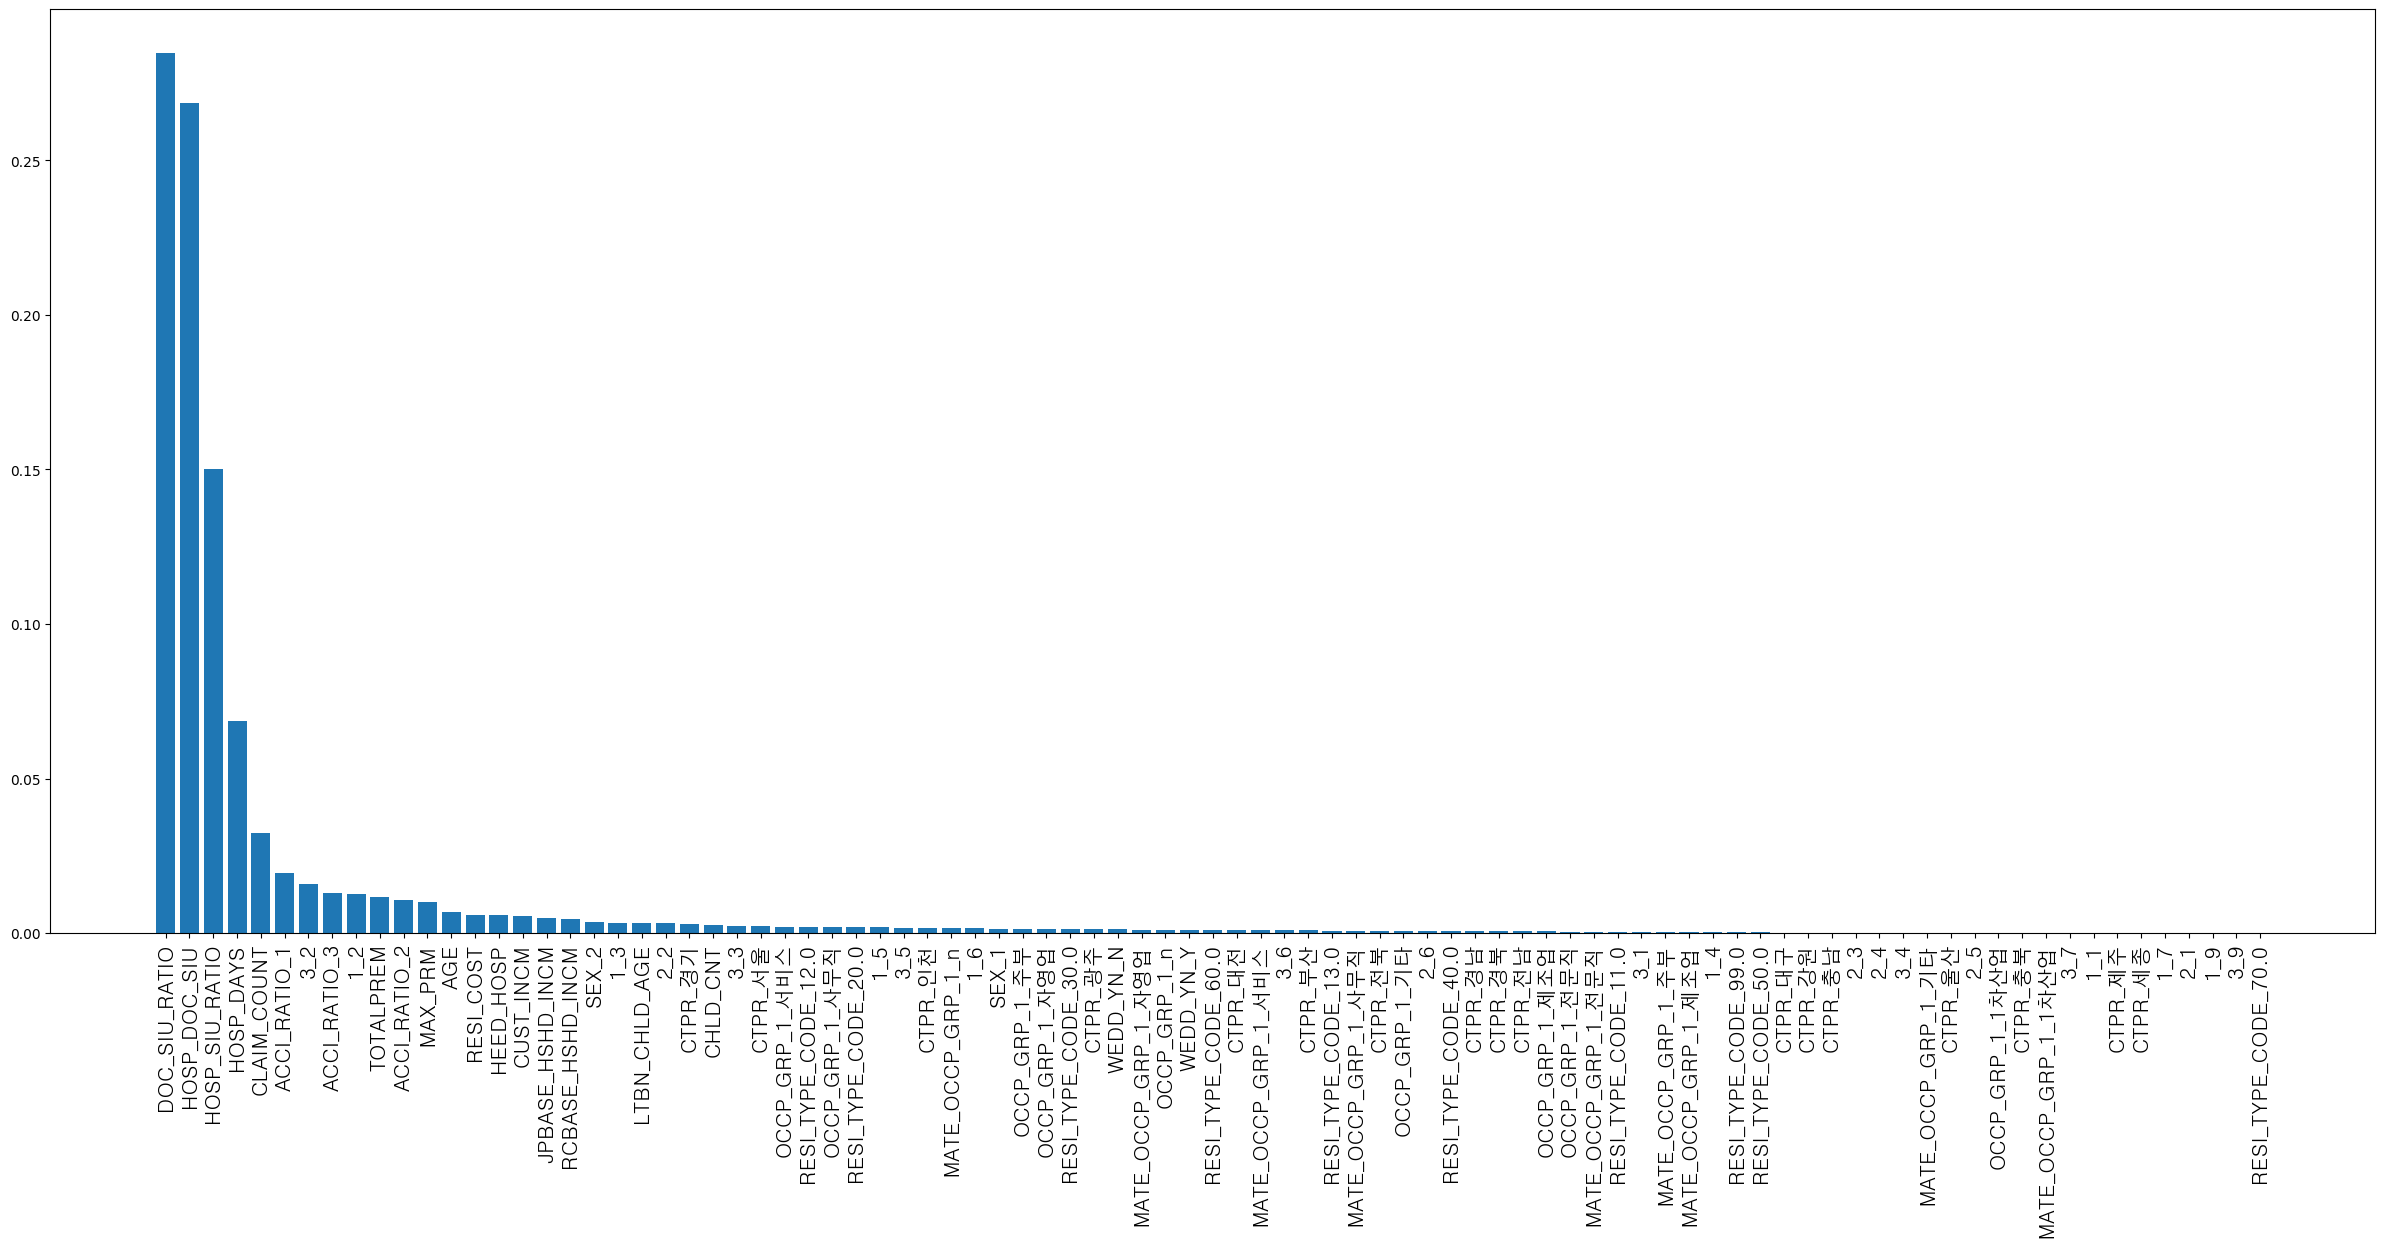

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRM.TTF" # HY중고딕
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30, 12))
plt.bar(imp_df.variable, imp_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [147]:
imp_df["cum_sum"] = np.cumsum(imp_df.importance)
imp_df.head()

,variable,importance,cum_sum
55,DOC_SIU_RATIO,0.284654,0.284654
57,HOSP_DOC_SIU,0.268503,0.553157
56,HOSP_SIU_RATIO,0.150013,0.70317
52,HOSP_DAYS,0.068679,0.771848
54,CLAIM_COUNT,0.032476,0.804325


In [148]:
imp_df.tail()

,variable,importance,cum_sum
67,1_7,0.0,1.0
69,2_1,0.0,1.0
68,1_9,0.0,1.0
82,3_9,0.0,1.0
13,RESI_TYPE_CODE_70.0,0.0,1.0


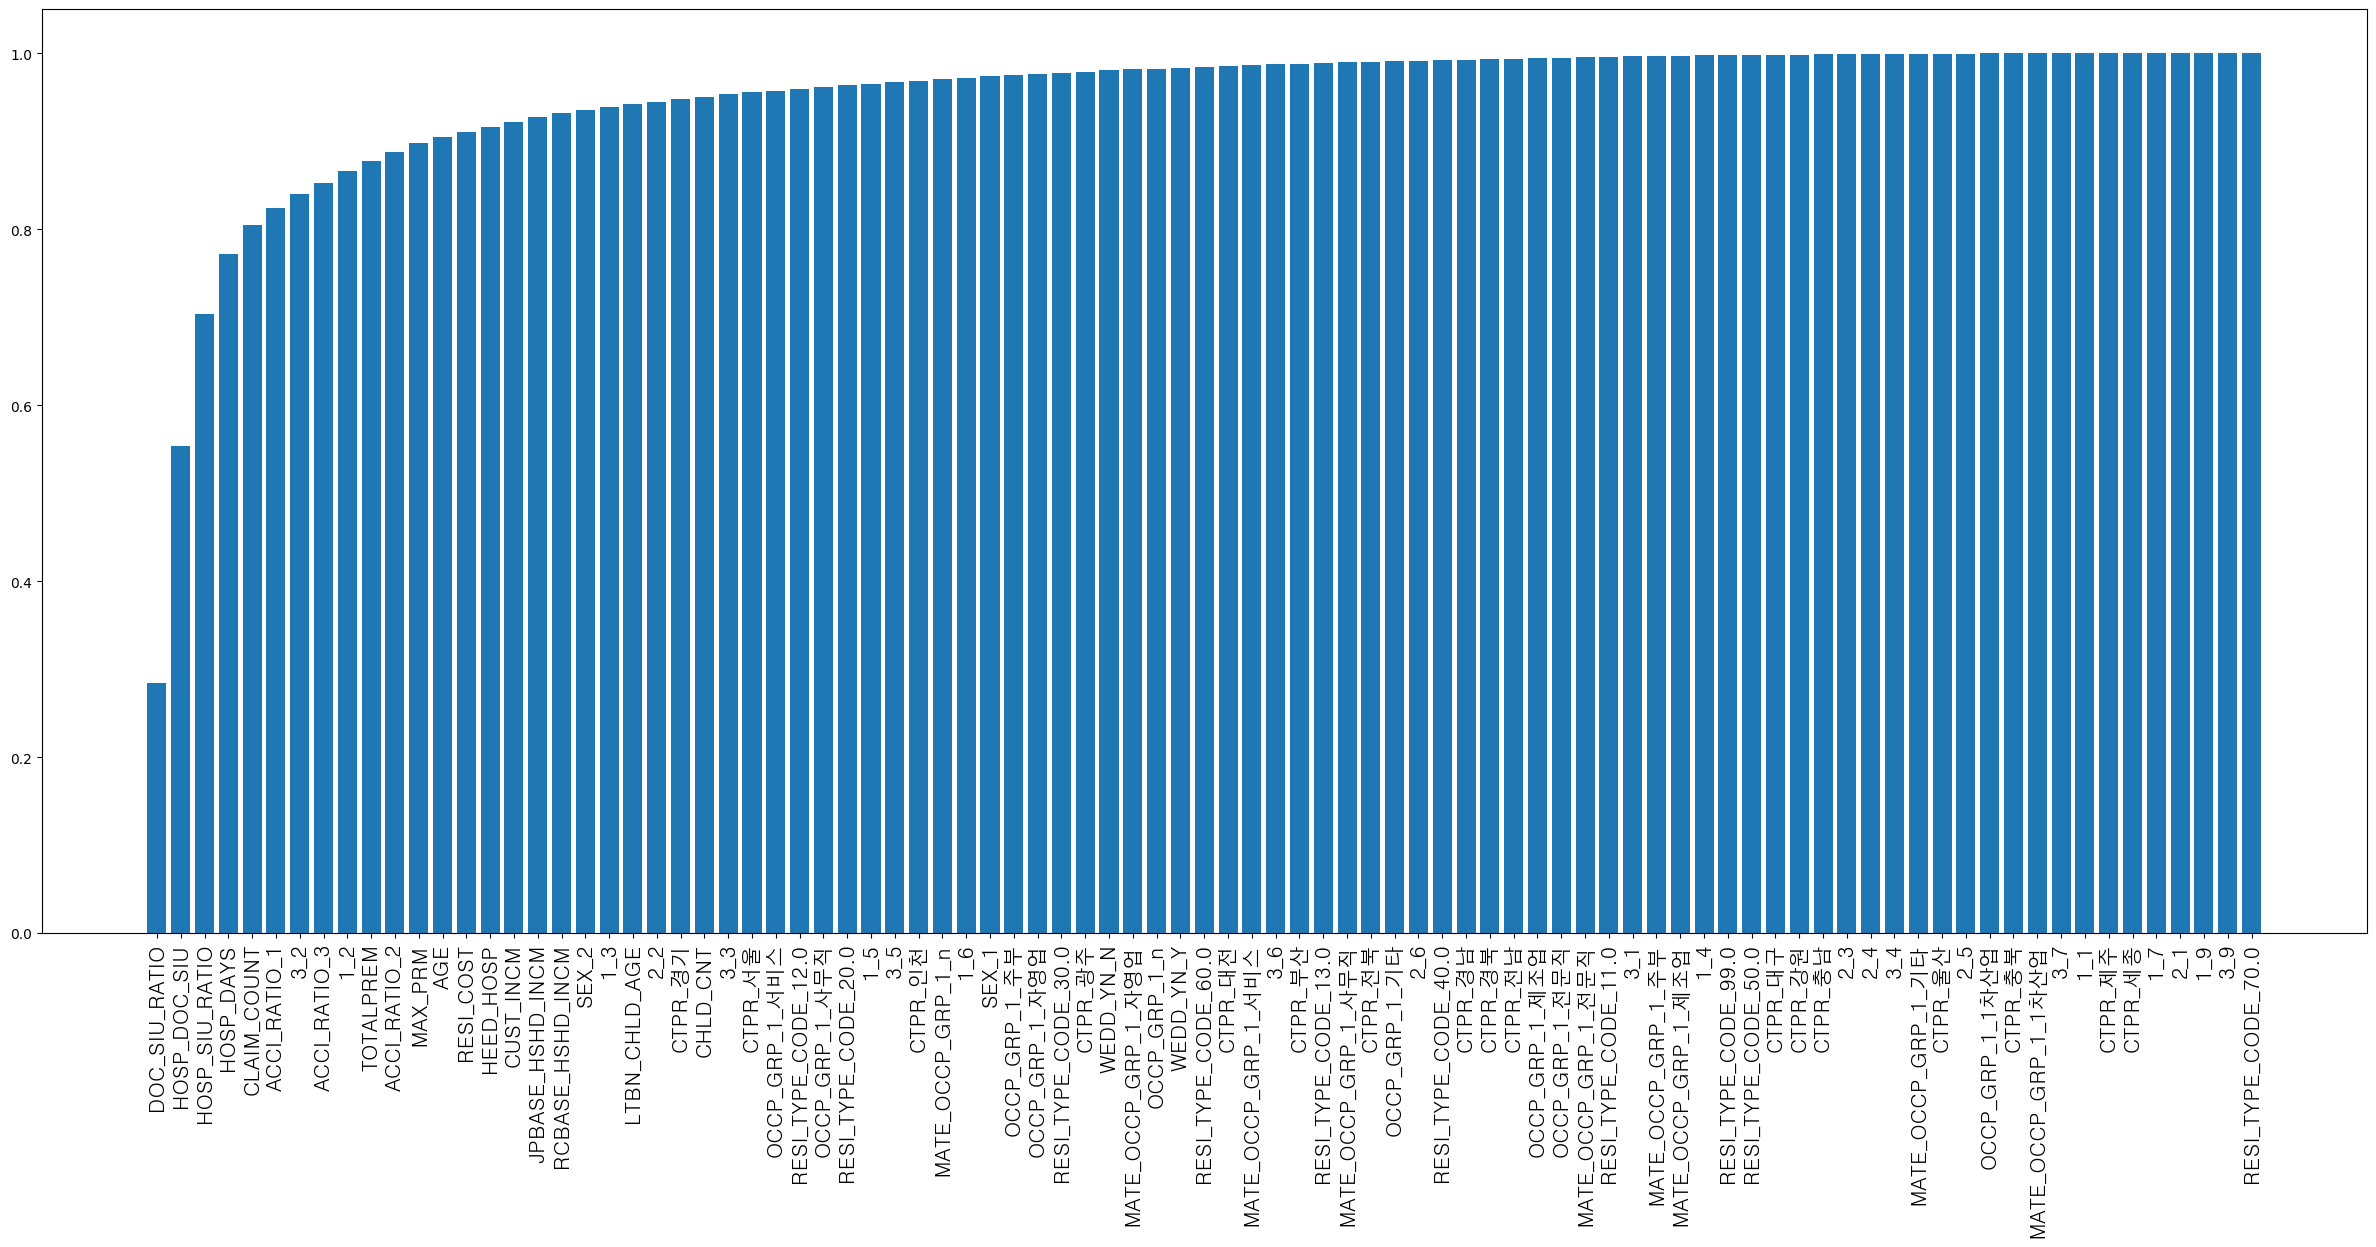

In [149]:
plt.figure(figsize=(30, 12))
plt.bar(imp_df.variable, imp_df.cum_sum)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [150]:
imp_df.loc[imp_df.cum_sum <= 0.9]

,variable,importance,cum_sum
55,DOC_SIU_RATIO,0.284654,0.284654
57,HOSP_DOC_SIU,0.268503,0.553157
56,HOSP_SIU_RATIO,0.150013,0.70317
52,HOSP_DAYS,0.068679,0.771848
54,CLAIM_COUNT,0.032476,0.804325
58,ACCI_RATIO_1,0.019425,0.82375
76,3_2,0.016008,0.839758
60,ACCI_RATIO_3,0.013,0.852758
62,1_2,0.012778,0.865536
84,TOTALPREM,0.011593,0.877129


In [151]:
imp_df.loc[imp_df.cum_sum <= 0.98]

,variable,importance,cum_sum
55,DOC_SIU_RATIO,0.284654,0.284654
57,HOSP_DOC_SIU,0.268503,0.553157
56,HOSP_SIU_RATIO,0.150013,0.70317
52,HOSP_DAYS,0.068679,0.771848
54,CLAIM_COUNT,0.032476,0.804325
58,ACCI_RATIO_1,0.019425,0.82375
76,3_2,0.016008,0.839758
60,ACCI_RATIO_3,0.013,0.852758
62,1_2,0.012778,0.865536
84,TOTALPREM,0.011593,0.877129


In [152]:
# import matplotlib
# matplotlib.font_manager._rebuild()

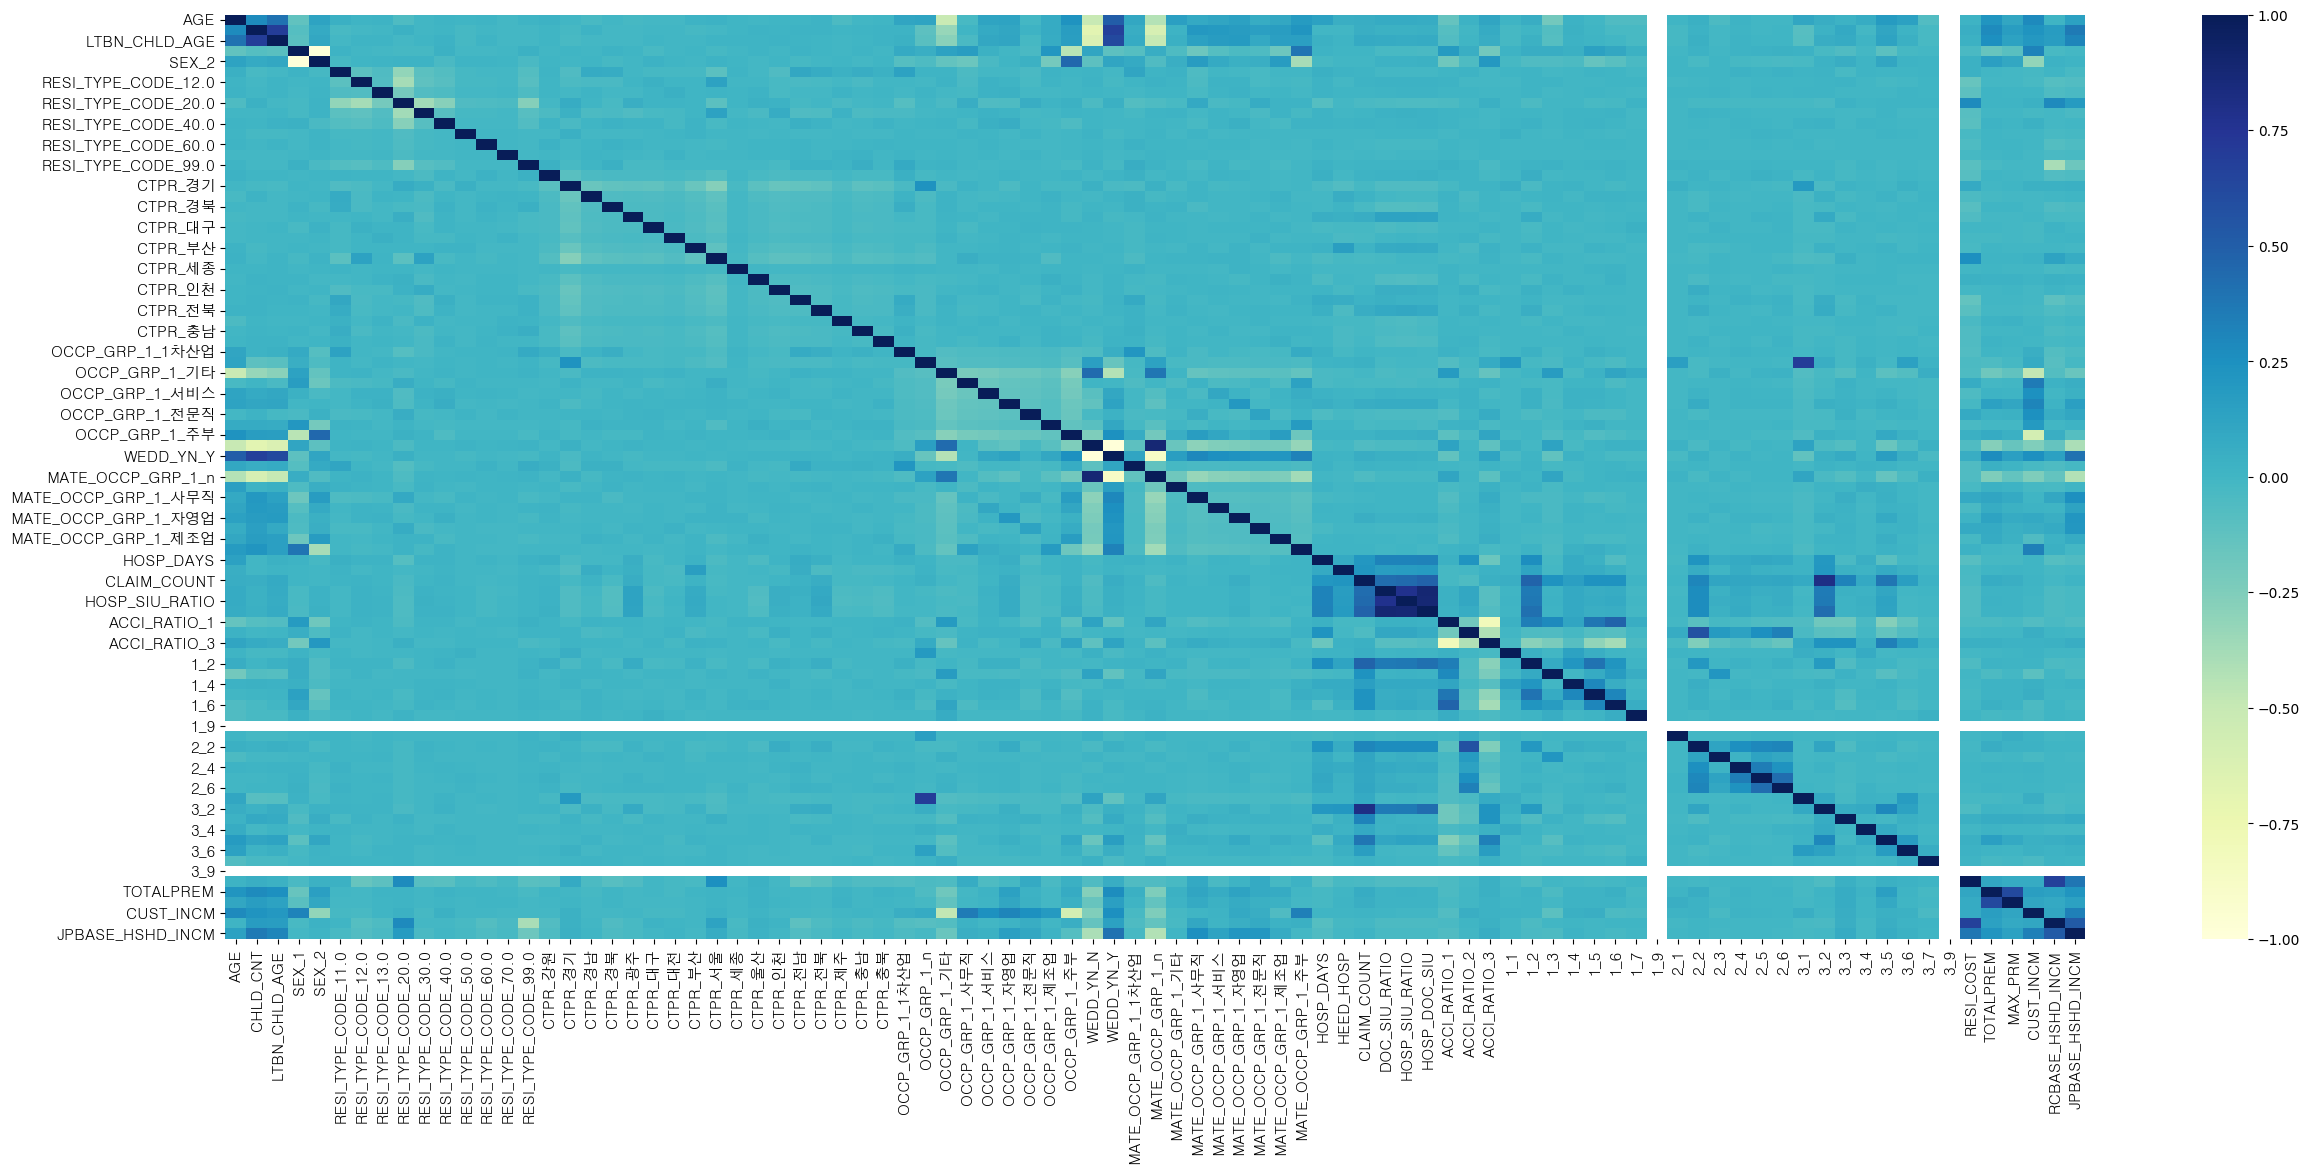

In [153]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import seaborn as sns
font_path = "C:/Windows/Fonts/H2GTRM.TTF" # HY중고딕
font_prop = fm.FontProperties(fname=font_path, size=11)
plt.figure(figsize=(30, 12))
sns.heatmap(train_X.corr(), vmin=-1, vmax=1, cmap="YlGnBu")
plt.xticks(rotation=90, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

In [154]:
imp_98_vars = list(imp_df.loc[imp_df.cum_sum <= 0.98].variable)
train_X_98 = train_X.loc[:, imp_98_vars]

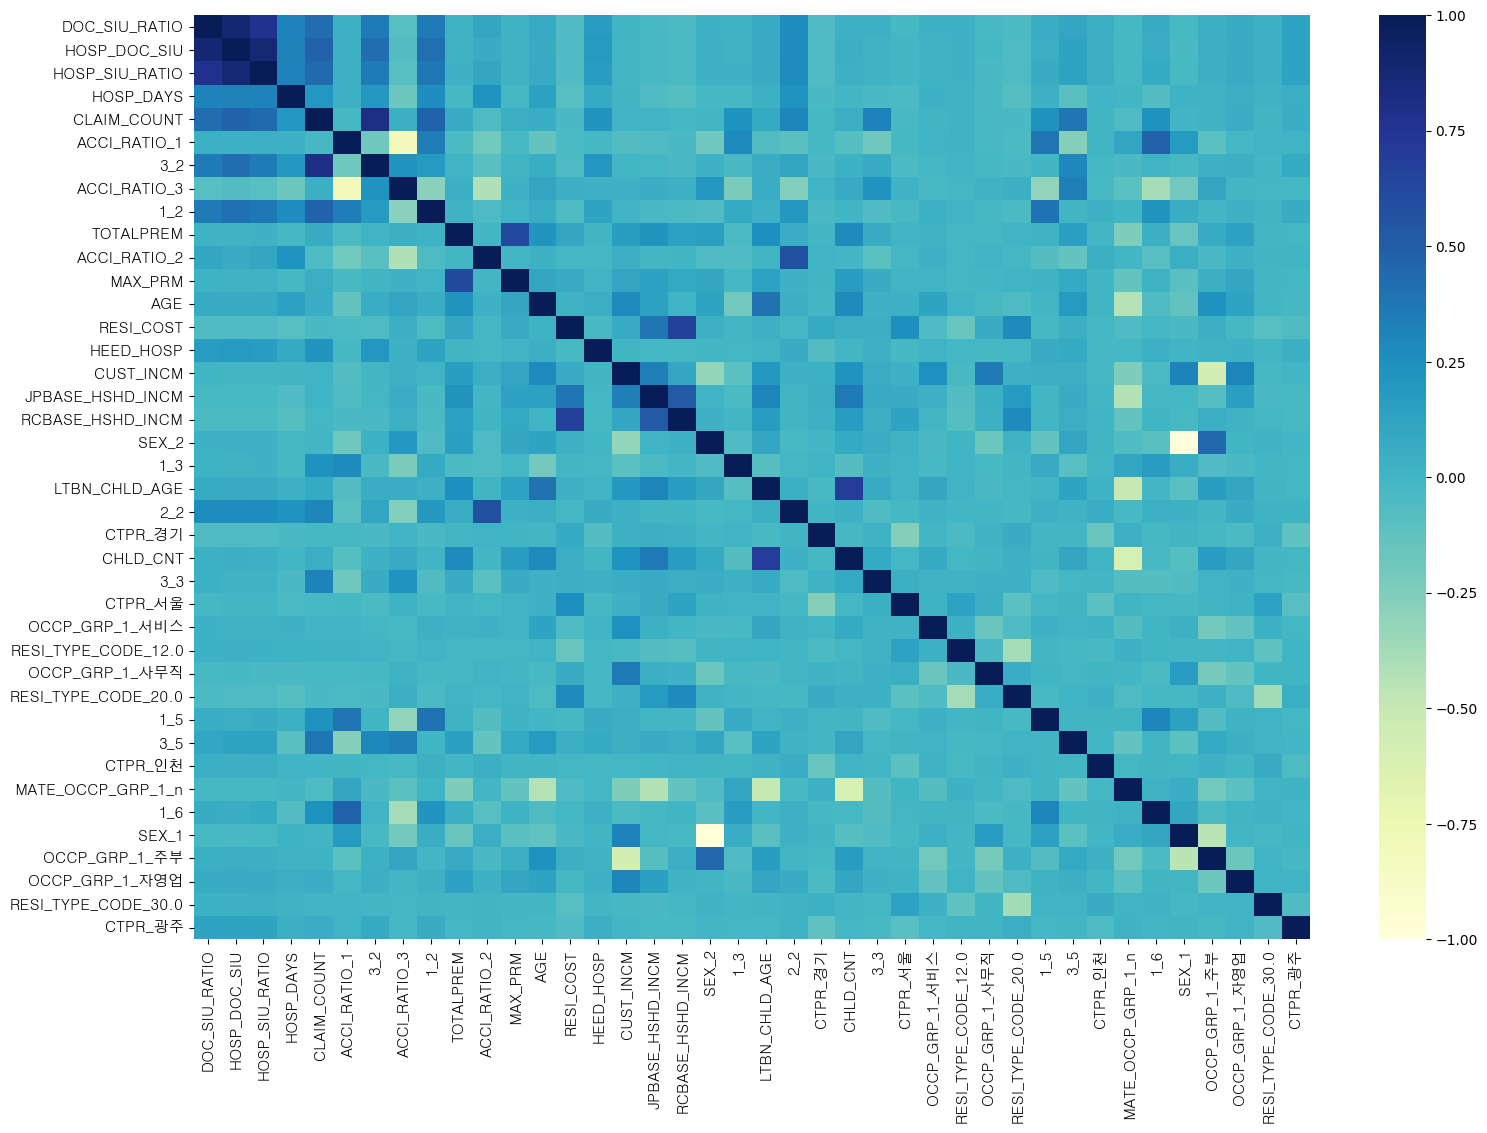

In [155]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import seaborn as sns
plt.figure(figsize=(18, 12))
sns.heatmap(train_X_98.corr(), vmin=-1, vmax=1, cmap="YlGnBu")
font_path = "C:/Windows/Fonts/H2GTRM.TTF" # HY중고딕
font_prop = fm.FontProperties(fname=font_path, size=11)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()